<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Loan_Application_Approval_Using_Explainable_AI_for_evaluation_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image, HTML, display, display_html
source_tautan = "https://skills.network/logos/SN_web_lightmode.png"
HTML(f'<div style="text-align: center;"><img src="{source_tautan}" style="max-width: 520px; height: auto;"></div>')

---
# Introduction:
---

In [ ]:
from IPython.display import Image, HTML, display, display_html
source_tautan = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/04wHogW9tE6C-p5iLSIeZg/cover-1%20-1-.png"
HTML(f'<div style="text-align: center;"><img src="{source_tautan}" style="max-width: 520px; height: auto;"></div>')

  Pada era AI-driven decision making, memahami bagaimana sebuah model dapat dijalankan dan di optimasikan menjadi suatu langkah dalam pengambilan keputusan yang penting dalam menentukan langkah selanjutnya yang akan diambil, terutama di era sensitif seperti **finance** yang memiliki tingkat risiko tertinggi saat menyimpulkan dan pengambilan keputusan yang prediktif kedepan.

  **Explainable AI (XAI)** adalah metode yang mungkin bisa menjadikan solusi yang baik untuk melakukan langkah prediktif kedepan. XAI menyediakan alat atau metode yang memungkinkan untuk **developers** dan **end-users** untuk bagaimana cara memahami finansial statment dan mempercayai, dan menggunakan model AI yang relevan dan efektif.

  Metode ini bertujuan agar membuat proses decision-making dari machine learning lebih transparan dan dapat di analisis dan interpretasi oleh berbagai stakeholders.

In [ ]:
from IPython.display import Image, HTML, display, display_html
source_tautan = "https://ars.els-cdn.com/content/image/1-s2.0-S1568494624000814-gr2.jpg"
HTML(f'<div style="text-align: center;"><img src="{source_tautan}" style="max-width: 1000px; height: auto;"></div>')

---
# Objectives:

---

  1. Set-up the environment: untuk bekerja dengan metode Explainable AI (XAI) pada set **Home Equity Line of Credit (HELOC)**.
  2. Load and explore dataset HELOC: memproleh wawasan tentang atribut data yang terkait dengan aplikasi kredit.
  3. Menerapkan teknik XAI untuk berbagai perspektif: menggunakan berbagai metode explanability yang disesuaikan dengan tiga perspektif untuk membuat model predictions lebih dapat di interpretable:
    * Data Scientist: (BRCG dan LogRR)
    * Loan Officers (ProtoDash)
    * Customers (CEM)
  4. melakukan evaluasi interpretabilitas: menganalisis perilaku model pada setiap XAI dalam meningkatkan transparansi dalam decision-making kredit.


Tugas ini akan mengembangkan kemampuan yang komprehensif dan luas dengan keterampilan praktis dalam menerapkan tool XAI untuk memenuhi berbagai persyaratan pengguna dalam credit risk assessment.

---
# 1. Installing And Importing Required Frameworks.
---

In [ ]:
# !pip install aix360
# !pip install openpyxl
# !pip install --no-deps xport
# !pip install tensorflow
# !pip install ecos
# !pip install cvxpy
# !pip install xport

In [ ]:
# pip install --upgrade pandas

In [ ]:
# pip install --upgrade numpy

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import xport

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import softmax
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.special import expit   # adalah untuk fungsi Sigmoid


from aix360.algorithms.rbm import FeatureBinarizer
from aix360.algorithms.rbm import BooleanRuleCG
from aix360.algorithms.rbm import LogisticRuleRegression
from aix360.algorithms.protodash.PDASH import ProtodashExplainer


import logging
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# set environment variabels to suppress Tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'    # suppress all but errors
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'    # disable oneDNN optimizations if desired
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'   # disable GPU usage if CUDA is not available
logging.getLogger('tensorflow').setLevel(logging.ERROR)

---
# 2. Background

---

   Home Equity Line of Credit (HELOC) adalah jalur kredit bergulir yang dijamin oleh Home Equity yang memberikan anda pinjaman dana sesuai kebutuhan. Ini mirip dengan kartu kredit. jalur kredit ini berbeda dengan pinjaman Home Equity karena HELOC memungkinkan anda menarik uang, membayarnya kembali, dan meminjam lagi selama periode penarikan.

   Cara kerja HELOC, anda bisa meminjam dengan menggunakan ekuitas yang tersedia di Home anda dan Home tersebut digunakan sebagai agunan untuk the line of credit. Saat melunasi saldo terutang, jumlah kredit yang tersedia akan diisi ulang seperti halnya kartu kredit. artinya anda dapat meminjam lagi dengan menggunakan kartu tersebut jika perlu, dan anda dapat meminjam sesedikit atau sebanyak yang anda butuhkan selama periode penarikan biasanya (10 tahun) sampau batas kredit yang anda tetapkan saat penutupan. diakhir periode penarikan, periode pembayaran (biasanya 20 tahun) dimulai.

   jika anda telah membangun ekuitas Home anda, jika nilainya lebih dari saldo hipotek anda, maka anda mungkin dapat menggunakan sebagian dari nilai tersebut untuk memenuhi finansial seperti uang tunai untuk proyek perbaikan rumah anda, pengeluran yang besar, biaya pendidikan, atau untuk membayar biaya tak terduga.

   **Apa beda HELOC dengan line of credit?**
   keduanya memungkinkan anda meminjam uang berdasarkan nilai taksiran Home anda, memberikan anda uang tunai saat anda membutuhkannya. berikut istilah dan perbedaan dari keduanya yang menentukan cara tersebut bisa membantu anda dalam menentukan keduanya cocok apa tidak untuk anda butuhkan:


   1. **What is a home equity line of credit?**
   HELOC menyediakan akses berkelanjutan ke dana. tidak seperti pinjaman konvensional, HELOC adalah **a resolving line of credit** yang memungkinkan anda meminjam lebih dari satu kali. dengan cara itu, HELOC seperti kartu kredit, kecuali dengan HELOC, Home anda digunakan sebagai agunan.
    * Heloc memiliki batas kredit dan jangka waktu pinjaman tertentu, yang biasanya 10 tahun. selama jangka waktu tersebut, anda menggunakan batas kredit anda untuk menarik uang (hingga batas kredit anda) saat anda membutuhkannya. anda hanya menggunakan dana tersebut saat anda membutuhkannya, dan anda dapat terus menggunakan dana tersebut saat anda melunasinya.
    * Heloc dapat dibuka untuk mendanai kebutuhan tertentu, atau dapat dibuka terlebih dahulu sehingga akses dana tersedia saat dibutuhkan.
    * anda hanya membayar bunga atas uang yang anda gunakan.
    * sebagian besar Heloc menggunakan **suku bunga variabel.** suku bunga tersebut dikaitkan dengan **suku bunga acuan** dan dapat disesuaikan naik atau turun.
    * anda mungkin dapat mengubah sebagian atau seluruh saldo utang anda pada HELOC dengan suku bunga variabel menjadi **pinjaman dengan suku bunga tetap.**
    * selama masa pinjaman, anda harus melakukan setidaknya pembayaran bulanan minimum atas jumlah yang anda utang, biasanya pembayaran ini mencakup sebagian pokok dan bunga.
    * setelah periode pinjaman berakhir, anda akan membayar sisa saldo pada HELOC anda, beserta bunganya, seperti pinjaman biasa. periode pembayaran biasanya 10 atau 20 tahun.

    
  2. What Is a home equity loan?
  HELOAN menyerupai pinjaman tradisional. anda meminjam uang tertentu, yang diberikan sebagai pembayaran tunai satu kali saat penutupan, lalu anda melakukan pembayaran rutin selama periode pembayaran tetap.
    * dengan pinjaman ekuitas home, anda mengajukan yang anda butuhkan.
    * sebagian besar mengenakan **suku bunga tetap** yang tidak dibutuhkan selama masa pinjaman.
    * setiap pembayaran, sama setiap bulan (jika HELOAN berbunga tetap), termasuk biaya bunga dan sebagai pokok pinjaman.

  pada proyek yang dibangun ini, akan mengungkapkan sebuah insight menggunakan HELOC datasets. Dataset HELOC terdiri dari aplikasi kredit anonim yang diajukan bank, dimana setiap aplikasi dinilai berdasarkan berbagai atribut keuangan. tujuannya adalah untuk membuat analisis prediksi tingkat resiko yang terkait dengan setiap pemohon, yang pad akhirnya membantu petugas pinjaman memutuskan apakah akan menyetujui atau menolak aplikasi tersebut.

untuk membangun analisis prediktif akan menggunakan tiga perspektif yaitu seorang **data scientist, loan officer,** dan **customer.**

  1. Data Scientist Perspective:
    * bagi data scientist, fokus utamanya adalah **mengevaluasi dan memahami model** sebelum **deployment**. mereka perlu memastikan transparansi, fairness, dan compliance dari model terhadap standar industri.
    * interpretable rule-based dari model mampu membantu seorang data scientist memverifikasi proses pengambilan keputusan model, memastikannya selaras dengan pedoman etika dan peraturan.

  2. Loan Officer Perspective:
    * petugas pinjaman menggunakan prediksi model untuk membuat keputusan kredit akhir. prioritas mereka adalah memahami setiap prediksi dengan cara yang relevan dan dapat ditindaklanjuti.
    * example-based explainations memungkinkan petugas pinjaman melihat kasus yang sebanding, sehingga hasil model lebih mudah ditafsirkan dan praktis untuk real-world decision-making.

  3. Customer Perspektive:
  * untuk seorang customer, kejelasan tentang alasan permohonan mereka disetujui atau ditolak sangatlah penting. sebagai customer non-teknis, mereka memerlukan penjelasan yang lugas
  * penjelasan yang kontras memberikan wawasan tentang fitur-fitur yang berkontrbusi pada hasil mereka dan apa yang dapat menyebabkan hasil yang berbeda, sehingga memberi mereka pemahaman yang jelas tentang keputusan tersebut.

dalam ketiga perspektif tersebut, dapat dieksplorasi ketiga perspektif ini, memanfaatkan berbagai teknik XAI untuk memenuhi kebutuhan setiap stakeholder's yang berkepentingan.

---
# 3. Data Loading and preprocessing
---

In [ ]:
source_data = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/TpQl93NfuzpDVAPaFzs8qg/heloc-dataset-v1.csv'
df = pd.read_csv(source_data)
df.head(11)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
5,Bad,59,137,11,78,31,0,0,91,1,...,47,0,0,0,62,93,12,4,3,94
6,Good,54,88,7,37,25,0,0,92,9,...,58,0,4,4,89,76,7,7,2,100
7,Good,68,148,7,65,17,0,0,83,31,...,44,0,0,0,28,48,2,2,2,40
8,Bad,59,324,2,138,24,0,0,85,5,...,26,0,1,1,68,-8,7,1,3,90
9,Bad,61,79,4,36,19,0,0,95,5,...,26,0,6,6,31,86,5,3,1,62


In [ ]:
df.shape

(10459, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

---
## 1. feature description:
---

  * **RiskPerformance**: Variabel target yang menunjukkan kinerja risiko pemohon (Baik/Buruk).
  * **ExternalRiskEstimate**: Perkiraan tingkat risiko eksternal yang terkait dengan riwayat kredit pemohon.
  * **MSinceOldestTradeOpen:** Bulan sejak perdagangan tertua pemohon (akun kredit) dibuka.
  * **MSinceMostRecentTradeOpen:** Bulan sejak perdagangan terakhir pemohon dibuka.
  * **AverageMInFile:** Rata-rata bulan yang tercatat untuk semua perdagangan.
  * **NumSatisfactoryTrades:** Jumlah perdagangan yang memuaskan (tidak menunggak) dalam riwayat pemohon.
  * **NumTrades60Ever2DerogPubRe:** Jumlah perdagangan setiap 60+ hari yang mengalami keterlambatan atau catatan publik yang merugikan.
  * **NumTrades90Ever2DerogPubRec:** Jumlah perdagangan setiap 90+ hari yang mengalami keterlambatan atau catatan publik yang merugikan.
  * **PercentTradesNeverDelq:** Percentage of trades that have never been delinquent.
  * **MSinceMostRecentDelq:** Bulan sejak kenakalan terakhir pemohon.
  * **MaxDelq2PublicRecLast12M:** Kenakalan maksimum dalam 12 bulan terakhir.
  * **MaxDelqEver:** Kenakalan maksimum yang pernah dilaporkan.
  * **NumTotalTrades:** Jumlah total perdagangan yang dilaporkan untuk pemohon.
  * **NumTradesOpeninLast12M**: Jumlah perdagangan yang dibuka dalam 12 bulan terakhir.
  * **PercentInstallTrades:** Persentase perdagangan angsuran dalam berkas kredit pemohon.
  * **MSinceMostRecentInqexcl7days:** Bulan sejak pertanyaan terakhir (tidak termasuk 7 hari terakhir).
  * **NumInqLast6M:** Jumlah pertanyaan kredit dalam 6 bulan terakhir.
  * **NumInqLast6Mexcl7days:** Jumlah pertanyaan kredit dalam 6 bulan terakhir (tidak termasuk 7 hari terakhir).
  * **NetFractionRevolvingBurden:** Fraksi saldo kredit bergulir relatif terhadap total batas kredit.
  * **NetFractionInstallBurden:** Fraksi saldo kredit angsuran relatif terhadap total batas kredit.
  * **NumRevolvingTradesWBalance:** Jumlah perdagangan bergulir dengan saldo terkini.
  * **NumInstallTradesWBalance:** Jumlah perdagangan angsuran dengan saldo lancar.
  * **NumBank2NatlTradesWHighUtilization:** Jumlah perdagangan bank/nasional dengan tingkat pemanfaatan yang tinggi.
  * **PercentTradesWBalance:** Persentase perdagangan yang saat ini memiliki saldo.



---
## 2. Checking for missing values
---

In [ ]:
df.isna().sum()

,0
RiskPerformance,0
ExternalRiskEstimate,0
MSinceOldestTradeOpen,0
MSinceMostRecentTradeOpen,0
AverageMInFile,0
NumSatisfactoryTrades,0
NumTrades60Ever2DerogPubRec,0
NumTrades90Ever2DerogPubRec,0
PercentTradesNeverDelq,0
MSinceMostRecentDelq,0


---
# 4. **Data Scientist** Perspective
---

  Sasaran Data Scientist adalah memahami dan validasi perilaku model secara menyeluruh sebelum dilakukan deployment, memastikan selaras dengan kebutuhan bisnis dan persyaratan regulasi. hal ini sangat penting dalam industri seperti perbankan, dimana transparansi dan explainability model sangat penting.

  pada bagian ini akan menunjukkan:

  * pengkodean dan memisahkan variabel target, **RiskPerformance**, untuk mengklasifikasi pelamar sebagai risiko kredit **baik** atau **buruk**.
  * memproses fitur terlebih dahulu agar dapat ditafsirkan dan sesuai untuk rule-based modeling.
  * melatih model yang dapat ditafsirkan seperti **Boolean Rule Column Generation (BRCG)** dan **Logistic Role Regression (LRR)**. untuk menghasilkan aturan yang jelas untuk penilaian risiko kredit.

In [ ]:
target = df.pop('RiskPerformance')
target

,RiskPerformance
0,Bad
1,Bad
2,Bad
3,Bad
4,Bad
...,...
10454,Good
10455,Bad
10456,Bad
10457,Bad


In [ ]:
le = LabelEncoder()
target_encoded = le.fit_transform(target)

---
## 1. Split data into training and testing sets
---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded)

---
## 2. Data Binarization and Standardization
---

 agar data sesuai untuk rule-based modeling, disini menggunakan **FeatureBinarizer** dari **AIX360.** alat ini mengubah fitur menjadi **indikator biner dan menstandardisasi fitur ordinal (fitur dengan urutan alami)** sehingga dapat dibandingkan dengan mudah.

---
### Apakah itu Interpretable rule-based modeling?
---

  **interpretable rule-based** adalah pendekatan **machine learning** yang menciptakan aturan sederhana dan mudah dipahami, seperti pernyataan **if-then**, untuk membuat prediksi. misalnya, suatu model dapat memprediksi applicant sebagai risiko kredit baik jika mereka memenuhi kiteria tertentu, seperti **IF ExternalRiskEstimate > 75 THEN Good Risk.**

---
### Apakah itu FeatureBinarizer?
---

  * adalah alat untuk mengubah data **continuous** dan **categorical** menjadi **fitur biner**, sehingga memudahkan **rule-based models** untuk ditafsirkan. alat ini juga menstandardisasi **fitur ordinal**, menyediakan versi **binary** dan **standardized.**
  * penggunaan **fitur biner** memungkinkan **rule-based models**, seperti **Boolean Rule Columns Generation (BRCG)**, untuk bekerja dengan kondisi yang disederhanakan, sehingga outputnya mudah ditafsirkan. selain itu, **fitur ordinal** terstandardisasi memungkinkan model yang mengandalkan hubungan numerik, seperti **Logistic Rule Regression (LRR)**, untuk berkinerja lebih baik.

In [ ]:
fb = FeatureBinarizer(negations=True, returnOrd=True)
fb

In [ ]:
train_data_bin, train_data_std = fb.fit_transform(X_train)
test_data_bin, test_data_std = fb.transform(X_test)

In [ ]:
train_data_bin

ExternalRiskEstimate                                               ...  \
                       <=                                            >  ...   
                     56.0 61.0 65.0 68.0 71.0 74.0 77.0 81.0 86.0 56.0  ...   
4597                    0    0    0    1    1    1    1    1    1    1  ...   
6693                    0    0    0    0    0    0    0    1    1    1  ...   
4688                    0    0    1    1    1    1    1    1    1    1  ...   
7322                    0    0    0    0    1    1    1    1    1    1  ...   
6424                    0    0    0    0    1    1    1    1    1    1  ...   
...                   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7605                    0    1    1    1    1    1    1    1    1    1  ...   
5879                    0    1    1    1    1    1    1    1    1    1  ...   
2491                    0    0    0    0    0    1    1    1    1    1  ...   
9301                    0    0    0    0    0    0    1    1    1    1  ...   
7641                    0    0    0    1    1    1    1    1    1    1  ...   

     PercentTradesWBalance                                                
                        <=    >                                           
                     100.0 29.0 43.0 50.0 58.0 67.0 71.0 79.0 86.0 100.0  
4597                     1    1    1    1    1    1    1    1    0     0  
6693                     1    0    0    0    0    0    0    0    0     0  
4688                     1    1    1    1    1    1    1    1    1     0  
7322                     1    1    1    1    1    1    0    0    0     0  
6424                     1    1    1    1    1    1    1    1    1     0  
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
7605                     1    1    1    1    1    1    1    1    1     0  
5879                     1    1    1    1    1    1    0    0    0     0  
2491                     1    1    1    1    1    1    1    1    1     0  
9301                     1    1    1    1    1    1    1    1    0     0  
7641                     1    1    1    1    1    0    0    0    0     0  

[8367 rows x 312 columns]

In [ ]:
test_data_bin

ExternalRiskEstimate                                               ...  \
                        <=                                            >  ...   
                      56.0 61.0 65.0 68.0 71.0 74.0 77.0 81.0 86.0 56.0  ...   
5685                     0    0    0    0    0    1    1    1    1    1  ...   
3684                     0    0    0    0    0    1    1    1    1    1  ...   
4229                     0    0    0    0    0    0    0    0    1    1  ...   
2895                     0    0    0    0    0    0    1    1    1    1  ...   
5159                     0    0    0    0    0    1    1    1    1    1  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5179                     0    0    1    1    1    1    1    1    1    1  ...   
7149                     0    0    0    0    0    0    0    0    1    1  ...   
7449                     0    0    0    0    0    0    1    1    1    1  ...   
10192                    0    0    1    1    1    1    1    1    1    1  ...   
9624                     0    0    0    0    0    0    0    0    1    1  ...   

      PercentTradesWBalance                                                
                         <=    >                                           
                      100.0 29.0 43.0 50.0 58.0 67.0 71.0 79.0 86.0 100.0  
5685                      1    1    1    1    0    0    0    0    0     0  
3684                      1    1    1    1    1    1    1    1    1     0  
4229                      1    1    1    1    1    1    0    0    0     0  
2895                      1    1    1    0    0    0    0    0    0     0  
5159                      1    1    1    1    1    1    1    1    1     0  
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
5179                      1    1    1    1    1    1    1    1    0     0  
7149                      1    1    1    0    0    0    0    0    0     0  
7449                      1    1    1    1    1    1    1    0    0     0  
10192                     1    1    1    1    1    1    1    0    0     0  
9624                      1    1    1    1    1    0    0    0    0     0  

[2092 rows x 312 columns]

In [ ]:
train_data_std

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
4597,0.028167,1.116169,-0.560051,0.796652,0.202932,0.383720,0.486722,0.204760,-0.086968,-0.244686,...,0.778722,-1.096184,0.659621,0.684534,-0.617469,0.067266,0.188937,0.743782,0.294063,0.719078
6693,0.595710,1.798051,-0.337754,0.412943,0.125918,-0.014714,0.063219,0.319994,3.028925,0.286111,...,-1.592624,-1.096184,-0.271288,-0.256611,-1.049448,-1.118861,-0.036994,-2.204099,0.590072,-1.406177
4688,-0.113719,-1.193139,-0.485952,-1.198635,-0.182139,-0.014714,0.063219,0.512051,-0.671198,0.551510,...,1.420962,0.053017,0.659621,0.684534,0.645238,0.423104,0.414867,0.498125,0.294063,0.971227
7322,0.122757,1.470748,-0.411853,0.515265,1.435156,0.383720,0.486722,-0.064120,0.789377,0.020713,...,-0.308145,0.053017,0.039015,0.057104,0.146801,-0.502075,1.318589,0.252468,0.294063,0.250801
6424,0.122757,-0.265779,-0.115457,0.131556,-0.644223,0.782154,0.486722,-0.525057,1.422293,0.286111,...,1.717380,0.053017,-0.271288,-0.256611,0.080342,-1.118861,-0.488854,0.006812,-0.001946,1.367461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7605,-0.492081,-1.584084,-0.263655,-1.710246,-1.029293,-0.014714,0.063219,0.512051,-0.671198,0.551510,...,0.877528,-1.096184,-0.271288,-0.256611,2.173778,1.277116,-0.036994,0.252468,0.294063,1.367461
5879,-0.397490,1.725317,-0.189556,1.103619,3.514535,-0.014714,0.063219,0.473640,-0.038282,-0.244686,...,0.679916,-1.096184,-0.271288,-0.256611,0.346176,0.257047,1.996380,1.480752,1.182089,0.250801
2491,0.217348,-0.056668,-0.560051,-0.354475,0.742030,-0.014714,0.063219,0.512051,-0.671198,0.551510,...,0.531707,-1.096184,0.659621,0.684534,0.944300,1.087335,0.640798,0.252468,0.590072,0.971227
9301,0.453824,-0.256687,0.625534,-0.073088,-0.028111,-0.014714,0.063219,0.319994,-0.038282,-0.244686,...,-0.011726,1.366389,-0.271288,-0.256611,-1.016219,1.063613,-0.262924,0.743782,-0.001946,0.863163


In [ ]:
test_data_std

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
5685,0.311938,-1.202230,-0.263655,-1.224215,-0.259153,-0.014714,0.063219,0.512051,-0.671198,0.551510,...,-0.653966,0.053017,0.039015,0.057104,0.445863,0.399382,-0.036994,0.252468,-0.001946,-0.217475
3684,0.264643,2.070804,2.107515,3.022164,0.279946,-0.014714,0.063219,0.012703,0.838063,0.286111,...,-0.308145,0.873874,-0.271288,-0.256611,0.213259,-1.118861,1.770450,0.006812,0.294063,1.367461
4229,0.690301,0.779774,1.588821,0.387362,-0.567209,-0.014714,0.063219,0.512051,-0.671198,0.551510,...,0.482304,0.053017,-0.271288,-0.256611,0.412634,-0.786745,-0.036994,0.252468,-0.001946,0.322844
2895,0.359234,1.598032,-0.337754,-0.149830,1.743212,-0.014714,0.063219,0.512051,-0.671198,0.551510,...,-0.900981,0.053017,0.039015,0.057104,-0.683928,0.945000,1.544519,0.252468,-0.001946,-0.505645
5159,0.264643,-0.238504,-0.337754,0.029234,-0.490195,0.383720,0.486722,0.243171,3.564470,0.286111,...,1.223350,-1.096184,0.039015,0.057104,2.173778,0.897555,-0.262924,0.252468,0.590072,1.367461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,-0.113719,0.088800,0.477335,0.540846,-0.028111,-0.014714,0.063219,0.319994,-0.135653,-0.244686,...,0.877528,0.053017,0.969923,0.998248,0.645238,-1.118861,0.188937,0.006812,0.590072,0.755099
7149,0.832186,-0.320329,-0.041358,-0.277733,-0.336167,-0.014714,0.063219,0.512051,-0.671198,0.551510,...,0.383498,0.053017,0.349318,0.370819,-0.883302,-0.169959,-0.488854,0.498125,-0.001946,-0.649730
7449,0.453824,-0.083944,-0.041358,-0.507958,-0.490195,0.383720,0.486722,0.512051,-0.671198,0.286111,...,-0.851578,0.053017,0.039015,0.057104,-0.850073,-1.118861,-0.262924,0.006812,-0.001946,0.466929
10192,-0.255605,1.416197,0.180939,0.592007,-0.105125,1.579022,0.486722,-1.331697,0.351205,0.286111,...,0.334095,1.366389,-0.271288,-0.256611,1.210133,1.039890,-0.036994,0.498125,0.590072,0.574993


  Output **FeatureBinarizer (train_data_bin)** sebelumnya menyediakan **transformed dataset**, dimana setiap **fitur asli** telah di split menjadi **indikator biner**, sehingga data dapat diinterpretasikan untuk rule-based models. berikut ini adalah rincian transformasi dan cara kerjanya:

  * **Binarization: Continuous Features** seperti **ExternalRiskEstimate** dan **PercentTradesBalance** di split menjadi **interval binar** (misalnya, **ExternalRiskEstimate <= 56.0 dan ExternalRiskEstimate > 56.0**). **setiap interval** adalah **fitur biner terpisah**, dengan **1** menunjukkan bahwa nilai berada dalam rentang tersebut, dan **0** menunjukkan tidak.

  * Negations: dengan negasi=True **teks tebal**, fitur pelengkap ditambahkan. misalnya, jika fitur **ExternalRiskEstimate > 56.0 create**, **versi yang dinegasikan**, **ExternalRiskEstimate <= 56.0, juga generated,** yang memungkinkan model untuk menggunakan kedua kondisi dalam aturannya.

  * **Standardization: binarizer** juga mengembalikan **fitur ordinal standar** (dalam **train_data_std** dan **test_data_std**), yang menskalakan masing-masing agar memiliki nol dan varians unit, yang membantu model yang bergantung pada hubungan numerik.

Format ini mendukung **rule-based modeling** yang dapat ditafsirkan dengan menyederhanakan kondisi menjadi indikator biner sekaligus menyediakan fitur standar untuk model seperti **Logistic Rule Regression (LRR).**

---
## 3. BooleanRuleCG (BRCG) model.
---

  Model BRCG adalah **rule-based model** yang mampu menghasilkan aturan **"if-then"** sederhana yang mengkategorikan applicant ke dalam kelompok, seperti risiko kredit **baik** atau **buruk**. model ini menggunakan **Conjunctive Normal Form (CNF)** atau **Disjunctive Normal Form (DNF)**, yang menciptakan aturan yang mudah dipahami dan dievaluasi.

  **Apakah itu BooleanCG?**

  Memanfaaatkan **model di AIX360** sebagai algoritma yang membangun aturan dalam **CNF (AND-of-OR)** atau **(OR-of-AND)**, keduanya merupakan bentuk logika umum. misalnya **CNF** menciptakan kondisi dimana beberapa pernyataan **OR** digabungkan dengan **AND**, sehingga mudah dibaca dan ditafsirkan.

  **Bagaimanakah BooleanEuleCG Bekerja?**

  * **Rule Formulation**: **BRCG** menghasilkan aturan dalam **CNF** atau **DNF**, dimana setiap bentuk memiliki pengguaan tertentu. Aturan **CNF** untuk klasifikasi **baik** **(Y=1)** mewakili kombinasi kondisi untuk **penerimaan**, sedangkan aturan DNF untuk klasifikasi **buruk** **(Y=0)** mewakili kondisi **penolakan.**

  * **Column Generation Optimization:** **BRCG **menggunakan **teknik pengoptimalan tingkat lanjut**, **pembuatan kolom untuk mencari secara efisien ruang luas kemungkinan kombinasi aturan.** teknik ini memastikan bahwa model menemukan serangkaian aturan yang paling prediktif dan ringkas.

  * **Complexity Control:** parameter seperti **lambda0** dan **lambda1** membatasi panjang aturan dengan memberi **penalti** pada klausa dan kondisi tambahan, menjaga model tetap sederhana dan dapat ditafsirkan.

  * pada proyek ini, **BRCG** dengan aturan **CNF** (diaktifkan oleh **CNF=True**) memberikan akurasi yang sedikit lebih baik untuk **lambda0** dan **lambda1** digunakan untuk menyeimbangkan **kesederhanaan dan akurasi** aturan.

In [ ]:
# membuat BRCG dengan pinalti kompleksitas kecil dan struktur CNF
brcg_model = BooleanRuleCG(lambda0=1e-4, lambda1=1e-4, CNF=True)
brcg_model

BooleanRuleCG(CNF=True, lambda0=0.0001, lambda1=0.0001)

In [ ]:
# Train The BRCG model pada data Training Biner
brcg_model.fit(train_data_bin, y_train)

Learning CNF rule with complexity parameters lambda0=0.0001, lambda1=0.0001
Initial LP solved
Iteration: 1, Objective: 0.3019
Iteration: 2, Objective: 0.3019
Iteration: 3, Objective: 0.3019
Iteration: 4, Objective: 0.3019
Iteration: 5, Objective: 0.3018
Iteration: 6, Objective: 0.2928
Iteration: 7, Objective: 0.2928
Iteration: 8, Objective: 0.2928
Iteration: 9, Objective: 0.2928
Iteration: 10, Objective: 0.2928
Iteration: 11, Objective: 0.2928
Iteration: 12, Objective: 0.2928
Iteration: 13, Objective: 0.2928
Iteration: 14, Objective: 0.2928


In [ ]:
print('Diprediksi Y=0 Jika Salah Satu dari Rules berikut Terpenuhi, Jika Tidak, Y=1:', brcg_model.explain()['rules'], '\n')
print('Model Is Predicting Y=0 (Bad Credit Risk) If The ExternalRiskEstimate <= 74')

Diprediksi Y=0 Jika Salah Satu dari Rules berikut Terpenuhi, Jika Tidak, Y=1: ['ExternalRiskEstimate <= 74.00'] 

Model Is Predicting Y=0 (Bad Credit Risk) If The ExternalRiskEstimate <= 74


---
### 1. Interpreting BRCG Model's Output
---

Model BRCG mendapatkan hasil rule-based model dalam **Conjunctive Normal Form (CNF)** untuk pengklasifikasian applicant.
  * **prediksi:** model memprediksi **Y=0** atau resiko yang dihasilkan adalah **buruk**, jika aturan berikut terpenuhi:
    * **ExternalRiskEstimate <= 74.00.**
  * jika tidak: jika aturan ini tidak terpenuhi, model memprediksi **Y=1** **(risiko kredit baik).**


**Explanation:**

  * **single rule** ini menunjukkan bahwa seorang applicant diklasifikasikan sebagai risiko kredit **buruk** jika ExternalRiskEstimate mereka adalah **74 atau dibawahnya.** ini masuk akal, karena **ExternalRiskEstimate** yang lebih rendah menunjukkan kemungkinan risiko kredit yang lebih tinggi.
  * model ini mencapai simplicity dengan berfokus pada satu ambang batas fitur, sehingga aturan mudah ditafsirkan. meskipun aturan ini sudah jelas, aturan ini mungkin tidak cukup semua nuansa dalam data, tetapi memberikan batasan keputusan yang jelas dan dapat ditafsirkan.

---
## 4. LogisticRuleRegression (LRR) Model.
---


  model **LogisticRuleRegression (LRR)** menggabungkan kondisi rule-based dengan **Logistic Regression** untuk memberikan prediksi probabilistik yang dapat ditafsirkan untuk tugas klasifikasi. pendekatan ini menangani fitur biner dan numerik, memberikan tampilan terperinci tentang probabilitas prediksi.

---
### Apakah itu LogisticRuleRegression?
---

  adalah algoritma dalam **AIX360** yang membangun aturan klasifikasi yang dapat ditafsirkan dengan **logistic regression,** menghasilkan skor probabilitas untuk setiap prediksi. LRR menggabungkan aturan **"if-then"** (**dibuat dari fitur biner**) dengan **fitur ordinal** untuk memprediksi hasil, seperti apakah applicant memiliki risiko kredit **baik** atau **buruk.**

---
### Bagaimakah cara kerja LogisticRuleRegression?
---

  * Combining Rules With **Logistic Ression:** **LRR** menggunakan **fitur biner (dari BRCG)** dan **fitur ordinal terstandarisasi** untuk membuat model logistic regression, yang menyediakan aturan yang jelas dan prediksi berbasis probabilitas.

  * **Controlling Complexity:** parameter seperti lambda0 dan lambda1 menjaga model tetap sederhana dan mudah ditafsirkan.

  * **Building on BRCG:** **LRR** menyempurnakan **BRCG** dengan menambahkan wawasan numerik dari data ordinal, sehingga lebih efektif untuk pemodelan risiko kredit.

  * **LRR Balances Simplicity and Accuracy,** sehingga cocok untuk datasets dengan **fitur biner** dan **kontinu** seperti **skor kredit** atau **trade counts**

---
### Perbandingan Dengan **BooleanRuleCH (BRCG)**
---

  * **Probabilistic Predictions:** **LRR** menawarkan **skor probabilitas**, bukan hanya hasil biner, yang memberikan **wawasan lebih mendalam** tentang klasifikasi **baik** atau **buruk**.

  * **Handles Numerical Data: LRR** bekerja dengan **fitur biner** dan **kontinu** dengan mengintegrasikan data **ordinal terstandarisasi**, sehingga **lebih fleksibel** daripada BRCG, yang hanya menangani aturan biner.

In [ ]:
# membuat LRR dengan penalti kompleksitas dan fitur ordinal yang sesuai
lrr_model = LogisticRuleRegression(lambda0=0.005, lambda1=0.001, useOrd=True)
lrr_model

LogisticRuleRegression(lambda0=0.005, lambda1=0.001, useOrd=True)

In [ ]:
# Train The LRR model pada data Training Biner dan Standar
lrr_model.fit(train_data_bin, y_train, train_data_std)

In [ ]:
print("Probabiltas Y=1 Diprediksi Sebagai Logistic(z) = 1 / (1 + exp(-z))")
print('\n')
print('Dimana (z) adalah Linear Combination Dari Rules / Numerical Features:')
lrr_model.explain()

Probabiltas Y=1 Diprediksi Sebagai Logistic(z) = 1 / (1 + exp(-z))


Dimana (z) adalah Linear Combination Dari Rules / Numerical Features:


,rule/numerical feature,coefficient
0,(intercept),0.532049
1,MSinceMostRecentInqexcl7days <= -8.00,1.455108
2,NumInqLast6M,-0.670384
3,MSinceMostRecentInqexcl7days <= 0.00,-0.587587
4,ExternalRiskEstimate <= 86.00 AND PercentTrade...,-0.567491
5,NumSatisfactoryTrades,0.538144
6,MaxDelq2PublicRecLast12M <= 5.00,-0.516142
7,NumRevolvingTradesWBalance <= 5.00,0.447513
8,AverageMInFile <= 46.00,-0.392713
9,ExternalRiskEstimate <= 74.00,-0.372934


---
### Interpretating LRR Model's Output
---

  Output **Model LogisticRuleRegression (LRR)** menunjukkan **daftar aturan** dan **fitur numerik**, yang masing-masing dipasangkan dengan **koefisien**. Rules dan fitur ini digabungkan untuk membuat **prediksi probabilistik** tentang risiko kredit dengan cara yang dapat ditafsirkan.

  Setiap baris mewakili kondisi atau fitur yang mempengaruhi prediksi:
  * **Rule / Numerical Feature**: menentukan rules (**misalnya, "ExternalRiskEstimate <= 86.00"**) atau continuous feature (**misalnya, "NumSatisfactoryTrades"**) yang berkontribusi pada model's decision.

  * **Coefficient:** menunjukkan pengaruh setiap rules atau fitur pada kemungkinan klasifikasi risiko kredit **baik** **(Y=1)**. **Koefisien positif** meningkatkan klasifikasi **baik**, sedangkan **keofisien negatif** menurunkannya.

  * Untuk contoh **koefisien positif** untuk **MSinceMostRecentInqexcl7days <= -8.00** menunjukkan bahwa jika kondisi ini terpenuhi, kemungkinan klasifikasi **baik** meningkat. seblaiknya, koefisien negatif untuk **ExternalRiskEstimate <= 86.00** menyiratkan bahwa memenuhi kondisi ini menurunkan kemungkinan klasifikasi **baik**.

---
### Mengapa Output Ini Penting?
---

  bagi seorang Data Scientist, Output ini penting karena menyediakan kemampuan interpretasi dan akurasi prediktif. dengan menganalisis koefisien, data scientist dapat memahami faktor-faktor utama yang mempengaruhi keputusan model, memastikan kewajaran, dan memenuhi persyaratan regulasi. **Transparansi LRR** membuatnya sangat cocok untuk **aplikasi High-stakes**, seperti penilaian risiko kredit, dimana pemahaman keputusan model sangat penting.
  
  singkatnya, **LRR** menggabungkan rule-based dengan continuous features untuk **menciptakan model yang seimbang**, **dapat ditafsirkan**, dan **efektif** untuk memprediksi risiko kredit.

---
## 5. Model Evaluation
---

In [ ]:
# For BRCG Predictions
brcg_train_pred = brcg_model.predict(train_data_bin)
brcg_test_pred = brcg_model.predict(test_data_bin)
print("BRCG Training Accuracy Model:", accuracy_score(y_train, brcg_train_pred))
print("BRCG Testing Accuracy Model:", accuracy_score(y_test, brcg_test_pred))
print('\n')
print("BRCG Classification Report (Testing Data):")
print('\n')
print(classification_report(y_test, brcg_test_pred, target_names=le.classes_))

BRCG Training Accuracy Model: 0.6983387116051153
BRCG Testing Accuracy Model: 0.7021988527724665


BRCG Classification Report (Testing Data):


              precision    recall  f1-score   support

         Bad       0.69      0.79      0.73      1092
        Good       0.72      0.61      0.66      1000

    accuracy                           0.70      2092
   macro avg       0.71      0.70      0.70      2092
weighted avg       0.71      0.70      0.70      2092



In [ ]:
# For LRR Predictions
lrr_train_pred = lrr_model.predict(train_data_bin, train_data_std)
lrr_test_pred = lrr_model.predict(test_data_bin, test_data_std)
print("LRR Training Accuracy:", accuracy_score(y_train, lrr_train_pred))
print("LRR Testing Accuracy:", accuracy_score(y_test, lrr_test_pred))
print('\n')
print("LRR Classification Report (Testing Data):")
print('\n')
print(classification_report(y_test, lrr_test_pred, target_names=le.classes_))

LRR Training Accuracy: 0.7334767539141867
LRR Testing Accuracy: 0.7260994263862333


LRR Classification Report (Testing Data):


              precision    recall  f1-score   support

         Bad       0.73      0.75      0.74      1092
        Good       0.72      0.70      0.71      1000

    accuracy                           0.73      2092
   macro avg       0.73      0.72      0.73      2092
weighted avg       0.73      0.73      0.73      2092



---
### Classification Report Summary:
---

  1. **BRCG Model:**
    * **Accuracy:** akurasi secara keseluruhan lebih rendah jika dibandingkan hasil dari LRR.
    * **Precision:** precision dapat diterima namun sedikit lebih rendah untuk risiko kredit **baik** (kelas 1)
    * **Recall:** penarikan kembali yang lebih rendah untuk risiko kredit **baik** (kelas 1), kehilangan beberapa hal positif yang sebenarnya.
    * **F1-score:** f1-skor yang lebih rendah mencerminkan bahwa trade-off yang kurang seimbang antara Precision dan Recall.


  2. **LRR Model:**
    * **Accuracy:** akurasi lebih tinggi, menunjukkan generalisasi yang lebih baik.
    * **Precision:** peningkatan precision, terutama untuk risiko kredit **baik** (kelas 1).
    * **Recall:** Recall yang lebih tinggi, mengurangi risiko kredit **baik** yang terlewat.
    * **F1-Score:** lebih tinggi menunjukkan keseimbangan yang lebih baik antara precision dan recall.

---
## 6. Visualisasi Model LRR sebagai Generalized Additive Model (GAM)
---

  Model dari LRR dapat diartikan sebagai **Generalized Additive Model atau GAM**, yang memecahkan prediksi menjadi kontribusi dari masing-masing fitur. dengan **Plotting Partial Dependence Plots (PDPs)** untuk setiap fitur, kita dapat memahami bahwa perubahan pada fitur tertentu dapat mempengaruhi probabilitas yang diprediksikan dengan menganggap semua fitur lainnya tetap konstan.

In [ ]:
dfx = lrr_model.explain()
dfx.head()

,rule/numerical feature,coefficient
0,(intercept),0.532049
1,MSinceMostRecentInqexcl7days <= -8.00,1.455108
2,NumInqLast6M,-0.670384
3,MSinceMostRecentInqexcl7days <= 0.00,-0.587587
4,ExternalRiskEstimate <= 86.00 AND PercentTrade...,-0.567491


---
### Partial Dependence Plots:
---

  untuk memahami pengaruh fitur-fitur individual pada prediksi model LRR, kami akan menvisualisasikan **Partial Dependence Plots (PDPs)** untuk fitur-fitur terpilih. PDPs memungkinkan kami melihat bagaimana bentuk perubahan pada satu fitur mempengaruhi probabilitas prediksi pemohon yang diklasifikasikan sebagai risiko kredit **baik**, sambil menjaga fitur-fitur lainnya tetap konstan.

  Fungsi **plot_partial_dependence** akan dibuat untuk menghasilkan PDPs untuk fitur-fitur tertentu dengan menghitung probabilitas pada rentang nilai. rentang ini berasal dari nilai asli **(non-standar)** fitur tersebut, yang memungkinkan kita untuk menginterpretasikan hasil pada skala alami.

  * **Input:**
    * Model LRR yang telah dilatih untuk mengekstrak keofisien fitur.
    * data training standar **(train_data_std)** untuk memperoleh rentang fitur.
    * nama fitur **(feature_name)** untuk menentukan efek fitur yang akan diplot.
    * penjelasan model **LRR DataFrame (dfx)** untuk mengekstrak koefisien fitur yang ditentukan.
  
  * **Output:**
    * plot probabilitas prediksi klasifikasi risiko kredit **baik** sebagai fungsi nilai fitur yang ditentukan.

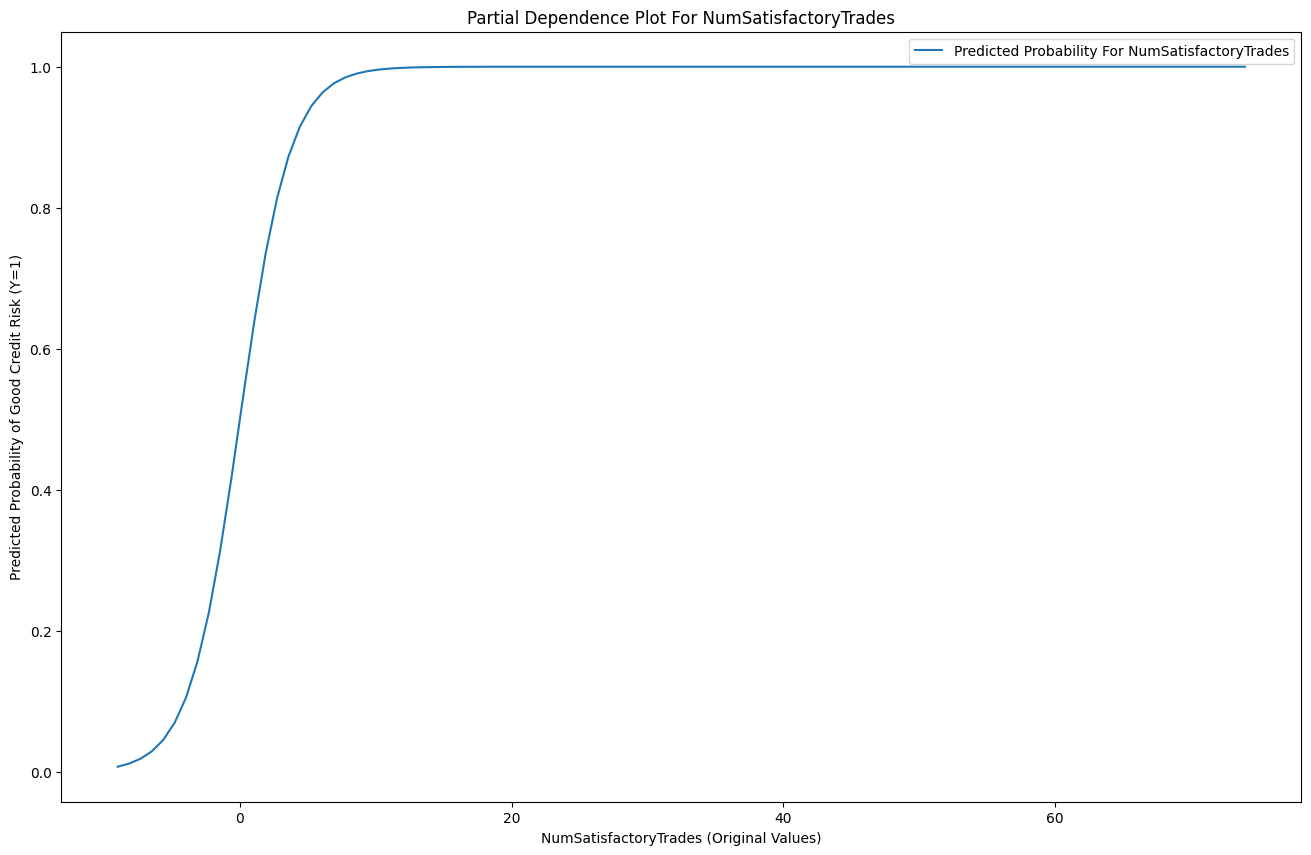

In [ ]:
def plot_partial_dependence(lrr, X_train_std, feature_name, dfx, y_label='Predicted Probability of Good Credit Risk (Y=1)'):
  # filter untuk fitur numerik yang ditentukan
  feature_coef = dfx[dfx['rule/numerical feature'].str.contains(feature_name)]

  # memastikan ada koefisien yang tersedia untuk fitur tersebut
  if not feature_coef.empty:
    coef_feature = feature_coef['coefficient'].values[0]
  else:
    raise ValueError(f"No Coefficient Found For '{feature_name}' in the LRR Model Explanation")

  # membuat rentang nilai untuk fitur yang ditentukan menggunakan nilai asli (non-standar)
  feature_range = np.linspace(X_train[feature_name].min(), X_train[feature_name].max(), 100)

  # menghitung logit secara manual tanpa interpretasi dengan asumsi tidak ada intersepsi yang tersedia.
  logits = coef_feature * feature_range
  probs = expit(logits)   #  menerapkan sigmoid ke logit untuk mendapatkan nilai probabilitas


  plt.figure(figsize=(16,10))
  plt.plot(feature_range, probs, label=f'Predicted Probability For {feature_name}')
  plt.ylabel(y_label)
  plt.xlabel(f'{feature_name} (Original Values)')
  plt.title(f'Partial Dependence Plot For {feature_name}')
  plt.legend()
  plt.show()
plot_partial_dependence(lrr_model, train_data_std, 'NumSatisfactoryTrades', dfx)

---
#### 1. Partial Dependence Plots of **NumSatisfactoryTrades** Feature.
---

  PDP menunjukkan bahwa **NumSatisfactoryTrades** merupakan faktor penting yang meningkatkan peluang untuk diklasifikasikan sebagai risiko kredit **baik**. Kenaikan tajam yang ditampilkan menunjukkan bahwa **applicant** dengan **trades yang lebih memuaskan** (**trades yang diselesaikan tanpa masalah**) jauh lebih mungkin dianggap **berisiko rendah**. Namun, setelah sejumlah perdagangan yang memuaskan, efek positif ini mereda, yang berarti bahwa trades yang memuaskan tambahan tidak secara signifikan meningkatkan probabilitas lebih lanjut.

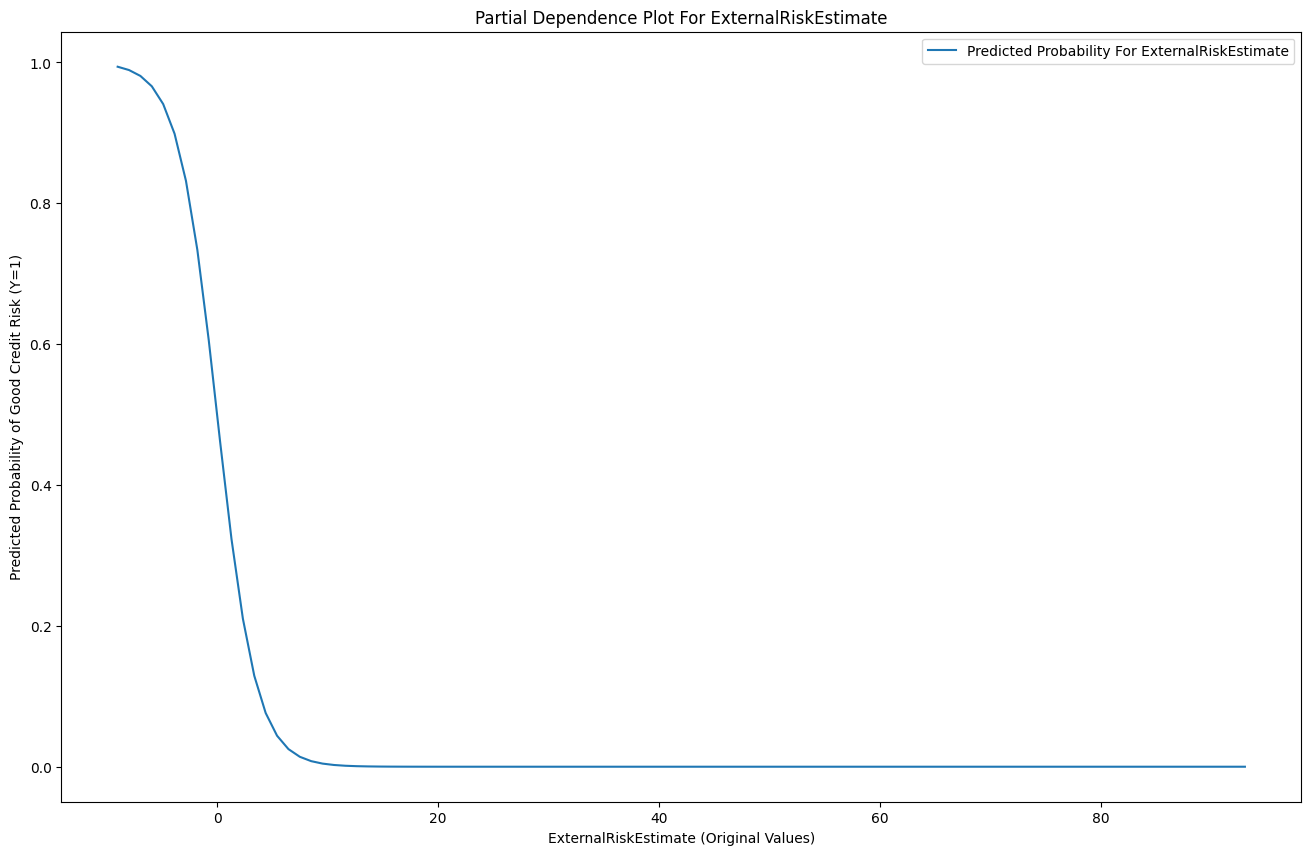

In [ ]:
plot_partial_dependence(lrr_model, train_data_std, 'ExternalRiskEstimate', dfx)

---
#### 2. Partial Dependence Plots of **ExternalRiskEstimate** Feature.
---

  PDP untuk **ExternalRiskEstimate** menunjukkan bahwa fitur ini sangat mempengaruhi peluang untuk diklasifikasikan sebagai risiko kredit **baik.** saat nilai **ExternalRiskEstimate semakin rendah** maka kemungkinan klasifikasi risiko kredit **baik** meningkat dengan cepat, hampir mencapai 100% untuk nilai yang sangat rendah. ini berarti bahwa nilai ExternalRiskEstimate uyang lebih rendah sangat terkait dengan **applicant** yang dianggap beresiko rendah. setelah titik tertentu, efek ini mendatar, yang berarti bahwa penurunan lebih lanjut dalam **ExternalRiskEstimate** tidak membuat banyak perbedaan.

---
# 5. **Loan Officer** Perspective:
---

  untuk **Loan Officers** ini, memahami bagaimana keputusan risiko kredit dibuat sangat penting untuk menilai aplikasi. selain menerima label **baik** atau **buruk** yang sederhana, **Loan Officer** dapat memperoleh manfaat dari melihat profil applicant yang serupa, membantu mereka memahami keputusan dalam konteks kasus yang sebanding.


  Untuk penerapan aplikasi risiko kredit ini, untuk mendukung pengambilan keputusan berdasarkan wawasan dari Loan Officer, bertugas:
    * **tinjau profil applicant:** analisis distribusi applicant **baik** untuk tinjauan umum pola risiko.
    * **Training model dengan Neural Networks (NN):** siapkan HELOC datasets dan bangun model klasifikasi untuk risiko kredit.
    * **protodash untuk explanations:** identifikasi profil serupa dari data pelatihan untuk memberikan wawasan yang dapat ditafsirkan ke dalam keputusan.


**Mengapa Protodash?**
  * Protodash menemukan profil prototipe, menyoroti contoh pelatihan yang paling mirip dengan applicant. hal ini memberikan perbandingan yang relevan kepada petugas pinjaman yang membenarkan klasifikasi seperti **baik** atau **buruk**.
  * menghadirkan **repetitive reasoning** (misalnya, hanya berfokus pada trades yang kurang memuaskan) dan memberikan penjelasan yang beragam, yang mencakup berbagai faktor yang mempengaruhi keputusan.
  * protodash bekerja dengan baik bahkan dengan distribusi data **non-standar**, seperti **time-series**, yang membuatnya lebih fleksibel daripada **traditional nearest-neighbor methods.**

In [ ]:
print("Size Of HELOC Datasets:", df.shape)
print("Number of \"Good\" Applicants:", np.sum(target=='Good'))
print("Number of \"Bad\" Applicants:", np.sum(target=='Bad'))

Size Of HELOC Datasets: (10459, 23)
Number of "Good" Applicants: 5000
Number of "Bad" Applicants: 5459


Distribution Of ExternalRiskEstimate and NumSatisfactory Columns:


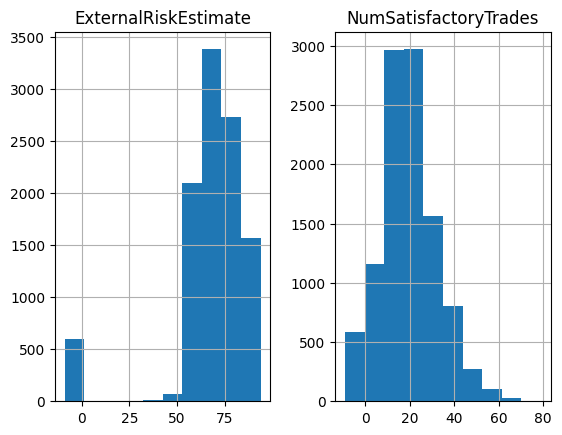

In [ ]:
print("Distribution Of ExternalRiskEstimate and NumSatisfactory Columns:")
hist = df.hist(column=['ExternalRiskEstimate', 'NumSatisfactoryTrades'], bins=10)

---
## 1. Split data into training and testing sets.
---

In [ ]:
X_train, X_test, y_train_b, y_test_b = train_test_split(df, target, test_size=0.2, random_state=42, stratify=target, shuffle=True)

In [ ]:
y_train_b = le.fit_transform(y_train_b)
y_train_b

array([0, 1, 1, ..., 1, 0, 0], shape=(8367,))

In [ ]:
y_test_b = le.transform(y_test_b)
y_test_b

array([1, 1, 1, ..., 1, 0, 1], shape=(2092,))

In [ ]:
y_train_b = to_categorical(y_train_b, num_classes=2)
y_train_b

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], shape=(8367, 2))

In [ ]:
y_test_b = to_categorical(y_test_b, num_classes=2)
y_test_b

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], shape=(2092, 2))

  Untuk menyiapkan data untuk training, dinormalkan nilai fitur ke rentang [-0.5, 0.5]. menormalkan data memastikan bahwa fitur berada pada skala yang sama, yang dapat meningkatkan kinerja model. setelah training, kemungkinan perlu mengubah skala data kembali ke nilai aslinya untuk interpretasi.

In [ ]:
# combine training and testing data to calculate normalization bounds
z = np.vstack((X_train, X_test))
z

array([[ 68, 307,   1, ...,   4,   1,  82],
       [ 80, 382,   4, ...,  -8,   2,  23],
       [ 65,  53,   2, ...,   3,   1,  89],
       ...,
       [ 77, 175,   8, ...,   1,   0,  75],
       [ 62, 340,  11, ...,   3,   2,  78],
       [ 83, 257,   5, ...,   6,   0,  64]], shape=(10459, 23))

In [ ]:
z_max = np.max(z, axis=0)
z_max

array([ 94, 803, 383, 383,  79,  19,  19, 100,  83,   9,   8, 104,  19,
       100,  24,  66,  66, 232, 471,  32,  23,  18, 100])

In [ ]:
z_min = np.min(z, axis=0)
z_min

array([-9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9,
       -9, -9, -9, -9, -9, -9])

In [ ]:
# normalize samples to range [-0.5, 0.5]
def normalize(data):
  normalized_data = (data-z_min) / (z_max-z_min)
  return normalized_data - 0.5

# rescale normalized data to original values
def rescale(normalized_data):
  return (normalized_data + 0.5) * (z_max-z_min) + z_min

# menerapkan normalization
X_normalized = normalize(z)
X_normalized

array([[ 0.24757282, -0.11083744, -0.4744898 , ..., -0.09375   ,
        -0.12962963,  0.33486239],
       [ 0.36407767, -0.01847291, -0.46683673, ..., -0.46875   ,
        -0.09259259, -0.20642202],
       [ 0.2184466 , -0.42364532, -0.47193878, ..., -0.125     ,
        -0.12962963,  0.39908257],
       ...,
       [ 0.33495146, -0.27339901, -0.45663265, ..., -0.1875    ,
        -0.16666667,  0.2706422 ],
       [ 0.18932039, -0.07019704, -0.44897959, ..., -0.125     ,
        -0.09259259,  0.29816514],
       [ 0.39320388, -0.17241379, -0.46428571, ..., -0.03125   ,
        -0.16666667,  0.16972477]], shape=(10459, 23))

In [ ]:
X_train_norm = X_normalized[:X_train.shape[0], :]
X_train_norm

array([[ 0.24757282, -0.11083744, -0.4744898 , ..., -0.09375   ,
        -0.12962963,  0.33486239],
       [ 0.36407767, -0.01847291, -0.46683673, ..., -0.46875   ,
        -0.09259259, -0.20642202],
       [ 0.2184466 , -0.42364532, -0.47193878, ..., -0.125     ,
        -0.12962963,  0.39908257],
       ...,
       [ 0.28640777, -0.26970443, -0.4744898 , ..., -0.15625   ,
        -0.09259259,  0.39908257],
       [ 0.33495146, -0.29679803, -0.43367347, ..., -0.09375   ,
        -0.16666667,  0.37155963],
       [ 0.24757282, -0.49876847, -0.4744898 , ..., -0.1875    ,
        -0.16666667,  0.19724771]], shape=(8367, 23))

In [ ]:
X_test_norm = X_normalized[X_train.shape[0]:, :]
X_test_norm

array([[ 0.30582524, -0.42487685, -0.46428571, ..., -0.15625   ,
        -0.16666667,  0.09633028],
       [ 0.2961165 ,  0.01847291, -0.38265306, ..., -0.1875    ,
        -0.12962963,  0.5       ],
       [ 0.38349515, -0.15640394, -0.4005102 , ..., -0.15625   ,
        -0.16666667,  0.23394495],
       ...,
       [ 0.33495146, -0.27339901, -0.45663265, ..., -0.1875    ,
        -0.16666667,  0.2706422 ],
       [ 0.18932039, -0.07019704, -0.44897959, ..., -0.125     ,
        -0.09259259,  0.29816514],
       [ 0.39320388, -0.17241379, -0.46428571, ..., -0.03125   ,
        -0.16666667,  0.16972477]], shape=(2092, 23))

---
## 2. Define and Train Neural Networks Classifier Model.
---

---
### 1. Define Neural Networks Architecture
---

create_nn, mendefenisikan model jaringan neural feed-forward sederhana tanpa aktivasi softmax di lapisan akhir, yang memungkinkan fleksibilitas dalam **fungsi loss** yang digunakan nanti.

Neural terdiri dari dua lapisan dense:

  * lapisan input dengan 12 dan 10 nodes.
  * lapisan hidden layer dengan 2 nodes output.


lapisan seperti ini cocok dengan tugas klasifikasi biner.

In [ ]:
def create_nn():
  model = Sequential()
  model.add(Dense(12, input_dim=23, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(10, kernel_initializer='he_uniform', activation='relu'))    # he_uniform Dirancang untuk aktivasi ReLU, menjaga varians output stabil agar tidak mengalami vanishing/exploding gradient.
  model.add(Dense(2, kernel_initializer='glorot_normal'))    # glorot_normal cocok menyeimbangkan varians input dan output.
  return model

  selanjutnya, setelah mendefenisikan yaitu menyusun dan melatih **model Neural Networks (NN)** untuk klasifikasi applicant sebagai risiko kredit **baik** atau **buruk.** penggunaan **EarlyStopping** memungkinkan untuk mencegah overfitting dengan menghentikan pelatihaan saat kinerja model pada set validasi berhenti membaik.

In [ ]:
# set random seeds for repeatability
np.random.seed(1)
tf.random.set_seed(2)

class_names = le.classes_

# Custom Loss Function Using Softmax Cross_entropy
def loss_function(correct, predicted):
  return tf.nn.softmax_cross_entropy_with_logits(labels=correct, logits=predicted)

# EarlyStopping Callback to Stop Training When Validation Loss Does Not Improve
early_stopping = EarlyStopping(monitor='val_loss',        # monitor to validation loss
                               patience=10,                 # number of epochs with no improvment before stopping
                               restore_best_weights=True)     # restore weights from the best epoch

# compile and print model summary
nn_model = create_nn()
nn_model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440 (1.72 KB)

 Trainable params: 440 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training The Neural Network With Early Stopping On The Normalized Training Data
nn_model.fit(X_train_norm, y_train_b, batch_size=128, epochs=150, verbose=1, shuffle=False, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5036 - loss: 0.7464 - val_accuracy: 0.5323 - val_loss: 0.6891
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5868 - loss: 0.6803 - val_accuracy: 0.6081 - val_loss: 0.6582
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6694 - loss: 0.6458 - val_accuracy: 0.6673 - val_loss: 0.6288
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6898 - loss: 0.6162 - val_accuracy: 0.6780 - val_loss: 0.6071
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6987 - loss: 0.5936 - val_accuracy: 0.6834 - val_loss: 0.5917
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.5795 - val_accuracy: 0.6852 - val_loss: 0.5859
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7081 - loss: 0.5738 - val_accuracy: 0.6941 - val_loss: 0.5830
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7086 - loss: 0.5707 - val_accuracy: 0.6971 - v

In [ ]:
# Evaluate Model Accuracy On Training Data
train_score = nn_model.evaluate(X_train_norm, y_train_b, verbose=1)
print('Training Accuracy:', train_score[1])

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7300 - loss: 0.5485  
Training Accuracy: 0.726186215877533


In [ ]:
test_score = nn_model.evaluate(X_test_norm, y_test_b, verbose=1)
print('Testing Accuracy:', test_score[1])

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7280 - loss: 0.5438  
Testing Accuracy: 0.7232313752174377


  Protodash menyediakan contoh pelamar yang profilnya sangat mirip dengan pelamar yang dimaksud kepada **Loan Officer**. dengan memeriksa contoh prototipe ini, petugas pinjaman dapat lebih memahami alasan dibalik klasifikasi risiko kredit tertentu. prototipe ini adalah profil nyata dari data training yang digunakan model untuk mempelajari pola dan mengklasifikasikan applicant sebagai **baik** atau **buruk.**

---
### 2. Dapatkan Contoh Serupa Sebagai Penjelasan Untuk Applicant HELOC yang diprediksi Sebagai **Baik.**
---


  untuk memberikan contoh bermakna kepada **Loan Officer**, kita perlu mengidentifikasi applicant dalam set training yang diklasifikasikan sebagai **baik** oleh model neural network. dengan mengisolasi contoh-contoh ini, kita dapat menggunakan sebagai referensi untuk menemukan profil serupa untuk setiap applicant tertentu.

In [ ]:
# dapatkan prediksi kelas sebagai 0 buruk atau 1 baik.
train_pred = np.argmax(nn_model.predict(X_train_norm), axis=1)      # dapatkan prediksi kelas sebagai 0 atau 1
train_pred = train_pred.reshape((train_pred.shape[0], 1))      # reshape bentuk agar sesuai dengan format asli
train_pred

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]], shape=(8367, 1))

In [ ]:
# menambahkan prediksi ke data training yang dinormalisasi
# menciptakan dataset gabungan dengan fitur yang dinormalisasikan dan label kelas yang diprediksi
norm_train_pred = np.hstack((X_train_norm, train_pred))
norm_train_pred

array([[ 0.24757282, -0.11083744, -0.4744898 , ..., -0.12962963,
         0.33486239,  0.        ],
       [ 0.36407767, -0.01847291, -0.46683673, ..., -0.09259259,
        -0.20642202,  1.        ],
       [ 0.2184466 , -0.42364532, -0.47193878, ..., -0.12962963,
         0.39908257,  0.        ],
       ...,
       [ 0.28640777, -0.26970443, -0.4744898 , ..., -0.09259259,
         0.39908257,  0.        ],
       [ 0.33495146, -0.29679803, -0.43367347, ..., -0.16666667,
         0.37155963,  1.        ],
       [ 0.24757282, -0.49876847, -0.4744898 , ..., -0.16666667,
         0.19724771,  0.        ]], shape=(8367, 24))

In [ ]:
# memfilter datasets gabungan untuk hanya menyimpan contoh yang diprediksikan sebagai baik kelas 1
good_norm_train = norm_train_pred[norm_train_pred[:, -1] ==1, :]
good_norm_train

array([[ 0.36407767, -0.01847291, -0.46683673, ..., -0.09259259,
        -0.20642202,  1.        ],
       [ 0.26699029, -0.06280788, -0.46938776, ..., -0.12962963,
         0.21559633,  1.        ],
       [ 0.31553398, -0.28940887, -0.45663265, ..., -0.16666667,
         0.29816514,  1.        ],
       ...,
       [ 0.40291262, -0.15517241, -0.4744898 , ..., -0.16666667,
         0.0412844 ,  1.        ],
       [ 0.28640777, -0.23029557, -0.45918367, ..., -0.12962963,
         0.0412844 ,  1.        ],
       [ 0.33495146, -0.29679803, -0.43367347, ..., -0.16666667,
         0.37155963,  1.        ]], shape=(3649, 24))

In [ ]:
# melakukan hal yang sama untuk data yang tidak dinormalisasi
unnorm_train_pred = np.hstack((X_train, train_pred))
print(f'Untuk Hasil Prediksi Yang Tidak Dinormalisasikan Dari Data Training:''\n')
print(unnorm_train_pred)
print('\n\n')
good_unnorm_train = unnorm_train_pred[unnorm_train_pred[:, -1] == 1, :]
print(f'Untuk Hasil Kelas Baik Yang Tidak Dinormalisasikan Dari Data Training:''\n')
print(good_unnorm_train)

Untuk Hasil Prediksi Yang Tidak Dinormalisasikan Dari Data Training:

[[ 68 307   1 ...   1  82   0]
 [ 80 382   4 ...   2  23   1]
 [ 65  53   2 ...   1  89   0]
 ...
 [ 72 178   1 ...   2  89   0]
 [ 77 156  17 ...   0  86   1]
 [ 68  -8   1 ...   0  67   0]]



Untuk Hasil Kelas Baik Yang Tidak Dinormalisasikan Dari Data Training:

[[ 80 382   4 ...   2  23   1]
 [ 70 346   3 ...   1  69   1]
 [ 75 162   8 ...   0  78   1]
 ...
 [ 84 271   1 ...   0  50   1]
 [ 72 210   7 ...   1  50   1]
 [ 77 156  17 ...   0  86   1]]


---
### 3. Prediction and Interpretation Untuk Sample Test Tertentu Menggunakan Neural Networks
---

disini, akan memilih test sample tertentu, membuat prediksi menggunakan model Neural Networks, dan menginterpretaskan hasilnya dengan:
  * menerapkan **Softmax** untuk mengubah logit menjadi **skor probabilitas**, membantu dalam memahami keyakinan model dalam klasifikasinya.
  * mengambil nilai fitur asli untuk sample yang dipilih, memberikan hasil yang dapat ditafsirkan yang mudah dipahami oleh **Loan Officer.**

dengan menampilkan kelas yang diprediksi dan nilai fitur asli, disini membuat keputusan model **lebih transparan** dan **dapat ditafsir**.

In [ ]:
# indeks test sample yang dipilih untuk prediksi
index = 14

# ubah bentuk sample yang dipilih untuk prediksi model
idx_norm = X_test_norm[index].reshape((1,)+ X_test_norm[index].shape)

# membuat prediksi menggunakan model dan terapkan aktivasi softmax untuk mendapatkan probabilitas
logits = nn_model.predict(idx_norm)
probs = softmax(logits).numpy()
predicted_class = np.argmax(probs)


print("Pemilihan Sample:", index)
print('\n')
print("Prediction Made By The Model:", class_names[predicted_class])
print('\n')
print("Predictions Probabilitas:", probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Pemilihan Sample: 14


Prediction Made By The Model: Good


Predictions Probabilitas: [[0.10792665 0.89207333]]


In [ ]:
# melampirkan kelas yang diprediksi ke nilai normalisasi sample yang dipilih untuk analisis lebih lanjut
idx_pred = np.hstack((idx_norm, [[predicted_class]]))
idx_pred

array([[ 0.40291262, -0.23029557, -0.46428571, -0.20663265, -0.04545455,
        -0.17857143, -0.17857143,  0.5       , -0.47826087,  0.38888889,
         0.5       , -0.1460177 , -0.07142857, -0.00458716, -0.04545455,
        -0.38      , -0.38      , -0.42946058, -0.32291667, -0.23170732,
        -0.09375   , -0.16666667,  0.00458716,  1.        ]])

In [ ]:
# mengambil dan menampilkan nilai fitur asli (tidak dinormalisasi) untuk sample yang dipilih
idx_orig = X_test_norm[index].reshape((1,) + X_test_norm[index].shape)
idx_orig

array([[ 0.40291262, -0.23029557, -0.46428571, -0.20663265, -0.04545455,
        -0.17857143, -0.17857143,  0.5       , -0.47826087,  0.38888889,
         0.5       , -0.1460177 , -0.07142857, -0.00458716, -0.04545455,
        -0.38      , -0.38      , -0.42946058, -0.32291667, -0.23170732,
        -0.09375   , -0.16666667,  0.00458716]])

In [ ]:
df_sample = pd.DataFrame.from_records(idx_orig.astype('double'))    # membuat DataFrame dengan nilai fitur asli
df_sample

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.402913,-0.230296,-0.464286,-0.206633,-0.045455,-0.178571,-0.178571,0.5,-0.478261,0.388889,...,-0.004587,-0.045455,-0.38,-0.38,-0.429461,-0.322917,-0.231707,-0.09375,-0.166667,0.004587


In [ ]:
df_sample[23] = class_names[predicted_class]   # menambahkan kelas prediksi ke DataFrame
df_sample[23]

,23
0,Good


In [ ]:
df_sample.columns = list(df.columns) + ['Prediction']   # menetapkan kolom dengan nama fitur dan prediksi
df_sample.transpose()

,0
ExternalRiskEstimate,0.402913
MSinceOldestTradeOpen,-0.230296
MSinceMostRecentTradeOpen,-0.464286
AverageMInFile,-0.206633
NumSatisfactoryTrades,-0.045455
NumTrades60Ever2DerogPubRec,-0.178571
NumTrades90Ever2DerogPubRec,-0.178571
PercentTradesNeverDelq,0.5
MSinceMostRecentDelq,-0.478261
MaxDelq2PublicRecLast12M,0.388889


  Output sebelumnya menunjukkan detail prediksi untuk sample 14, kasus test kusus yang melewati model neural networks training untuk menentukan klasifikasi risiko kreditnya.

  * **prediction:** model mengklasifikasikan applicant sebagai **baik**, menunjukkan bahwa mereka kemungkinan memenuhi syarat untuk **Loan** tersebut.
  * **Prediction Probabilities:** model menunjukkan high confidence level dengan nilai probabilitas sekitar **10% untuk buruk** dan **90% untuk baik**.
  * **Feature Values:** setiap fitur dicantumkan dengan nilai normalnya untuk applicant ini, yang menyoroti detail utama profil applicant.
  * **Prediction Outcome:** kolom terakhir mengonfirmasi prediksi **baik**, yang memberikan alasan yang jelas dibalik keputusan tersebut.


uraian singkat ini memberikan gambaran yang jelas tentang nilai fitur applicant, keyakinan model, dan keputusan akhir, yang membantu stakeholder memahami alasan dibalik klasifikasi tersebut.

---
### 4. ProtodashExplainer:
---

  **ProtodashExplainer** adalah algoritma dalam **AIX360** yang dirancang untuk memberikan penjelasan dengan memilih contoh prototipe atau profil pengguna serupa dari datasets. pendekatan ini bisa membantu dalam memahami titik data atau kelompok titik data tertentu dengan membandingkannya dengan contoh serupa dari data training, sehingga sangat berguna untuk aplikasi seperti **loan approvals.**

---
#### 1. Apakah Itu ProtodashExplainer?
---

  merupakan algoritma dalam **AIX360** **yang memilih contoh representatif** atau **prototipe** dari datasets untuk menjelaskan titik data tertentu. algoritma ini mengidentifikasi serangkaian contoh yang paling mirip dengan contoh target berdasarkan nilai fitur, membantu pengguna melihat pola dan karakteristik dalam data yang mendukung keputusan model.

---
#### 2. Bagaimanakah Cara Kerja ProtodashExplainer?
---

  * **Prototype Selection:** ProtodashExplainer memilih sejumlah prototipe tertentu dari set training dengan meminimalkan perbedaan** maximum mean discrepancy (MMD)** antara contoh target dan prototipe. ini memastikan prototipe tersebut sedapat mungkin mewakili target
  * **Greedy Optimization With Weights:**
   algoritma menggunakan pendekatan greedy untuk menemukan prototipe yang paling cocok dan menetapkan bobot untuk setiap prototipe, yang mencerminkan kesamaannya dengan contoh target. bobot yang lebih tinggi menunjukkan kesamaan yang paling dekat.

In [ ]:
# menghapus kolom terakhir (kelas yang diprediksi) dari z_train_good
# kecualikan kolom terakhir untuk menyimpan hanya fitur
good_applicant_features = good_norm_train[:, :-1]
good_applicant_features

array([[ 0.36407767, -0.01847291, -0.46683673, ..., -0.46875   ,
        -0.09259259, -0.20642202],
       [ 0.26699029, -0.06280788, -0.46938776, ..., -0.15625   ,
        -0.12962963,  0.21559633],
       [ 0.31553398, -0.28940887, -0.45663265, ..., -0.125     ,
        -0.16666667,  0.29816514],
       ...,
       [ 0.40291262, -0.15517241, -0.4744898 , ..., -0.1875    ,
        -0.16666667,  0.0412844 ],
       [ 0.28640777, -0.23029557, -0.45918367, ..., -0.125     ,
        -0.12962963,  0.0412844 ],
       [ 0.33495146, -0.29679803, -0.43367347, ..., -0.09375   ,
        -0.16666667,  0.37155963]], shape=(3649, 23))

In [ ]:
explainer = ProtodashExplainer()
(W, S, setValues) = explainer.explain(idx_norm, good_applicant_features, m=5)   # gunakan set fitur yang telah diperbaiki

Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point


In [ ]:
print(f"W: {W}\n")
print(f"S: {S}\n")
print(f'setValues: {setValues}')

W: [0.64814893 0.03040902 0.08572449 0.11235863 0.12519391]

S: [ 647 3542  499 2842 1094]

setValues: [1.04495479 1.04826611 1.05268839 1.05434287 1.05599899]


  Output dari ProtodashExplainer menyediakan 3 komponen kunci yang membantu kita untuk memahami kesamaan antara applicant target dan prototipe terpilih:

  * Weights (W): bobot yang lebih tinggi menunjukkan kesamaan yang lebih besar antara target dan prototipe terpilih.
  * Indeks (S): setiap indeks memetakan ke profil data training, yang memungkinkan kita untuk memeriksa nilai fitur yang mendorong similarity.
  * Nilai MMD (setValues): skor ini mengukur perbedaan keseluruhan antara target dan prototipe, nilai yang lebih rendah menunjukkan kecocokan yang lebih dekat dengan target.

dengan menggunakan proses ini menghasilkan output yang membantu untuk identifikasi profil yang paling representatif dari data training dan menilai kesamaan relatifnya dengan applicant target, sehigga memberikan konteks yang dapat ditafsir untuk keputusan model.

---
### 5. Displaying Similar Applicant Profiles:
---

  pengkodean ini membuat DataFrame **(prototypes_df)** untuk menampilkan profil pelamar yang paling mirip **(prototypes)** dengan applicant target berdasarkan fitur yang dipilih.

  * Extract Feature Values: menampilkan nilai fitur dari prototipe terpilih dari data training.
  * Add Predicted Class: menambahkan kelas yang diprediksi untuk setiap prototipe berdasarkan data training asli.
  * Add Similarity Weights: menambahkan bobot yang dinormalisasikan untuk menunjukkan seberapa mirip setiap prototipe dengan applicant target (bobot yang lebih tinggi = kesamaan yang lebih besar).

tabel ini akan menunjukkan perbandingan yang jelas antara nilai fitur, prediksi, dan skor similarity yang membantu dalam menginterpretasikan keputusan model.

In [ ]:
# membuat DataFrame untuk prototipe yang dipilih (hanya nilai fitur, tidak termasuk kolom prediksi)
prototypes_df = pd.DataFrame.from_records(good_unnorm_train[S, 0:-1].astype('double'))
prototypes_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,83.0,182.0,6.0,79.0,40.0,0.0,0.0,100.0,-7.0,7.0,...,43.0,6.0,0.0,0.0,3.0,75.0,3.0,3.0,0.0,46.0
1,89.0,379.0,156.0,257.0,3.0,0.0,0.0,100.0,-7.0,7.0,...,33.0,-7.0,0.0,0.0,0.0,-8.0,0.0,-8.0,-8.0,0.0
2,90.0,245.0,2.0,98.0,7.0,0.0,0.0,100.0,-7.0,7.0,...,63.0,21.0,0.0,0.0,11.0,79.0,2.0,2.0,0.0,80.0
3,77.0,154.0,3.0,55.0,31.0,0.0,0.0,100.0,-7.0,7.0,...,63.0,2.0,2.0,1.0,26.0,74.0,5.0,14.0,0.0,86.0
4,87.0,483.0,7.0,222.0,12.0,0.0,0.0,100.0,-7.0,7.0,...,17.0,0.0,0.0,0.0,1.0,94.0,1.0,1.0,0.0,25.0


In [ ]:
# menambahkan nama kelas yang diprediksi (baik atau buruk) ke kolom ke-24
predicted_labels = []
for i in range(S.shape[0]):
  predicted_labels.append(class_names[int(good_norm_train[S[i], -1])])   # append class names
prototypes_df[23] = predicted_labels    # menambahkan kolom prediksi

In [ ]:
# menambahkan bobot yang dinormalisasikan sebagai kolom terpisah untuk menunjukkan kesamaan
prototypes_df["Weight"] = np.around(W,5) / np.sum(np.around(W,5))   # menghitung bobot yang dinormalisasikan
prototypes_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Weight
0,83.0,182.0,6.0,79.0,40.0,0.0,0.0,100.0,-7.0,7.0,...,0.0,0.0,3.0,75.0,3.0,3.0,0.0,46.0,Good,0.646966
1,89.0,379.0,156.0,257.0,3.0,0.0,0.0,100.0,-7.0,7.0,...,0.0,0.0,0.0,-8.0,0.0,-8.0,-8.0,0.0,Good,0.030354
2,90.0,245.0,2.0,98.0,7.0,0.0,0.0,100.0,-7.0,7.0,...,0.0,0.0,11.0,79.0,2.0,2.0,0.0,80.0,Good,0.085563
3,77.0,154.0,3.0,55.0,31.0,0.0,0.0,100.0,-7.0,7.0,...,2.0,1.0,26.0,74.0,5.0,14.0,0.0,86.0,Good,0.112155
4,87.0,483.0,7.0,222.0,12.0,0.0,0.0,100.0,-7.0,7.0,...,0.0,0.0,1.0,94.0,1.0,1.0,0.0,25.0,Good,0.124961


In [ ]:
# mendefenisikan nama kolom termasuk "prediksi" dan "bobot" untuk kejelasan.
column_names = list(df.columns) + ['Prediction', 'Weight']
column_names

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'Prediction',
 'Weight']

In [ ]:
prototypes_df.columns = column_names
prototypes_df.transpose()

,0,1,2,3,4
ExternalRiskEstimate,83.0,89.0,90.0,77.0,87.0
MSinceOldestTradeOpen,182.0,379.0,245.0,154.0,483.0
MSinceMostRecentTradeOpen,6.0,156.0,2.0,3.0,7.0
AverageMInFile,79.0,257.0,98.0,55.0,222.0
NumSatisfactoryTrades,40.0,3.0,7.0,31.0,12.0
NumTrades60Ever2DerogPubRec,0.0,0.0,0.0,0.0,0.0
NumTrades90Ever2DerogPubRec,0.0,0.0,0.0,0.0,0.0
PercentTradesNeverDelq,100.0,100.0,100.0,100.0,100.0
MSinceMostRecentDelq,-7.0,-7.0,-7.0,-7.0,-7.0
MaxDelq2PublicRecLast12M,7.0,7.0,7.0,7.0,7.0


Table ini mampu memberikan wawasan dan prediksi yang diberikan oleh lima profil dari applicant prototipe yang dipilih yang paling mirip dengan pelamar target. setiap baris mewakili satu fitur, dan setiap kolm (0-4) sesuai dengan salah satu prototipe yang dipilih. berikut adalah rincian elemen-elemen kunci:

* **Feature Values:** setiap sel berisi nilai asli (tidak dinormalisasikan) untuk fitur tertentu, yang memungkinkan kita untuk membandingkan setiap profil prototipe secara langsung.

* **Prediction:** semua prototipe telah diklasifikasikan sebagai **baik** oleh model, yang menunjukkan bahwa applicant ini disetujui.

* **Weight:** baris berakhir menunjukkan bobot kesamaan setiap prototipe relatif terhadap applicant target. bobot yang lebih tinggi menunjukkan kecocokan yang lebih dekat. bobot dinormalisasi untuk berjumlah 1.

Tabel ini membantu dalam menginterpretasikan keputusan model dengan membandingkan applicant target dengan profil yang serupa yang menawarkan wawasan tentang karakteristik applicant lain yang juga diklasifikasikan sebagai **baik.**

sebagai bagian dari pembelajaran, dapatkan contoh serupa sebagai penjelasan untuk **applicant HELOC** yang diprediksikan sebagai buruk untuk mendapatkan pemahaman lebih lanjut.

---
## 6. Customer Perspective: Contrastive Explanations For HELOC Use Case.
---

bagi pemilik rumah yang mengajukan HELOC, memahami alasan dibalik persetujuan atau penolakan sangatlah penting. penjelasan kontrastif memberikan wawasan dengan berfokus pada:

  * Pertinent negatives (PNs): mengidentifikasikan perubahan minimal yang, jika dilakukan pada profil applicant, akan mengubah keputusan model (misalnya, dari **reject** menjadi **accept.**)
  * Partinent Positives (PPs): menunjukkan serangkaian fitur dan nilai minimal yang diperlukan untuk mempertahankan keputusan awal. misalnya, jika permohonan disetujui, penjelasannya dapat menunjukkan bahwa meskipun nilai tertentu lebih rendah, pinjaman tersebut akan tetap diterima.


In [ ]:
# beberapa contoh penggunaan menarik untuk dicoba: 2344, 449, 1168, 1272
index1 = 1272
index2 = 449
index3 = 2002
index4 = 1168

# ubah bentuk sample yang dipilih untuk prediksi model.
target_sample1 = X_test_norm[index1].reshape((1,) + X_test_norm[index1].shape)
target_sample2 = X_test_norm[index2].reshape((1,) + X_test_norm[index2].shape)
target_sample3 = X_test_norm[index3].reshape((1,) + X_test_norm[index3].shape)
target_sample4 = X_test_norm[index4].reshape((1,) + X_test_norm[index4].shape)
print(f'Prediction Index 1: {target_sample1}')
print('\n')
print(f'Prediction Index 2: {target_sample2}')
print('\n')
print(f'Prediction Index 3: {target_sample3}')
print('\n')
print(f'Prediction Index 4: {target_sample4}')

Prediction Index 1: [[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]]


Prediction Index 2: [[ 0.1407767  -0.28694581 -0.45663265 -0.30867347 -0.01136364  0.5
   0.5         0.44495413 -0.09782609  0.33333333  0.14705882 -0.11061947
  -0.14285714 -0.10550459 -0.43939394 -0.38       -0.38       -0.40456432
  -0.33958333 -0.18292683 -0.03125    -0.16666667  0.28899083]]


Prediction Index 3: [[ 0.38349515 -0.20073892 -0.47193878 -0.23979592  0.21590909 -0.17857143
  -0.17857143  0.5        -0.47826087  0.38888889  0.5        -0.03982301
  -0.03571429 -0.21559633 -0.16666667 -0.35333333 -0.35333333 -0.44190871
  -0.41666667 -0.15853659 -0.1875     -0.12962963 -0.12385321]]


Prediction Index 4: [[ 0.13106796 -0.26847291 -0.46938776 -0.30102041 -0.09090909 -0.10714286
  -0.10714286  0.38073394 -0.38043478  0.22222222  0.14705882 -0.1460177
  -0.03571429 -0.05963303 -0.22727273 -0.31333333 -0.31333333 -0.30497925
  -0.35

In [ ]:
# membuat prediksi menggunakan model dan tetapkan softmax untuk mendapatkan nilai probabiltasnya.
logits1 = nn_model.predict(target_sample1)
logits2 = nn_model.predict(target_sample2)
logits3 = nn_model.predict(target_sample3)
logits4 = nn_model.predict(target_sample4)


probs1 = softmax(logits1).numpy()
probs2 = softmax(logits2).numpy()
probs3 = softmax(logits3).numpy()
probs4 = softmax(logits4).numpy()


print(f'Logits1: {logits1}')
print(f'Logits2: {logits2}')
print(f'Logits3: {logits3}')
print(f'Logits4: {logits4}')
print('\n')
print(f'Prediction Probabilitas1: {probs1}')
print(f'Prediction Probabilitas2: {probs2}')
print(f'Prediction Probabilitas3: {probs3}')
print(f'Prediction Probabilitas4: {probs4}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Logits1: [[ 0.0184905  -0.09418902]]
Logits2: [[0.18680213 0.24622762]]
Logits3: [[-1.0914477  1.016117 ]]
Logits4: [[ 0.6712805 -0.925312 ]]


Prediction Probabilitas1: [[0.5281401  0.47185987]]
Prediction Probabilitas2: [[0.48514798 0.514852  ]]
Prediction Probabilitas3: [[0.10836374 0.8916362 ]]
Prediction Probabilitas4: [[0.8315416 0.1684584]]


In [ ]:
predicted_class1 = np.argmax(probs1)
predicted_class2 = np.argmax(probs2)
predicted_class3 = np.argmax(probs3)
predicted_class4 = np.argmax(probs4)
print('Computing Pertinent Negatives For Sample:', index1)
print('Prediction Made By The Model is:', class_names[predicted_class1])
print('\n')

print('Computing Pertinent Positives For Sample:', index2)
print('Prediction Made By The Model is:', class_names[predicted_class2])
print('\n')

print('Computing Pertinent Positives For Sample:', index3)
print('Prediction Made By The Model is:', class_names[predicted_class3])
print('\n')

print('Computing Pertinent Negatives For Sample:', index4)
print('Prediction Made By The Model is:', class_names[predicted_class4])
print('\n')

Computing Pertinent Negatives For Sample: 1272
Prediction Made By The Model is: Bad


Computing Pertinent Positives For Sample: 449
Prediction Made By The Model is: Good


Computing Pertinent Positives For Sample: 2002
Prediction Made By The Model is: Good


Computing Pertinent Negatives For Sample: 1168
Prediction Made By The Model is: Bad




---
### 7. Compute Partinent Negative (PN)
---

fungsi ini untuk mengidentifikasi **pertinent negative (PN)**, yang menunjukkan perubahan terkecil yang diperlukan untuk membalik prediksi model (misalnya, dari **reject** menjadi **approve**). ini membantu applicant memahami penyesuaian minimal yang diperlukan untuk mengubah hasil mereka.

Function Flow:
  * **Prepare data:** mengonversikan data pelamar menjadi variabel TensorFlow untuk pengoptimalan
  * **Set up optimization:** menggunakan pengoptimalan Adam untuk menyesuaikan data secara berulang.
  * **Adjust Feature:**
    * menghitung skor model untuk kelas target (misalnya, **approve**)
    * menentukan loss function untuk memaksimalkan skor kelas target.
    * memperbaharui data menggunakan gradien, membuat perubahan kecil yang ditargetkan.
  * **Early Stopping:** berhenti saat penyesuaian minimal, sebagaimana ditentukan oleh toleransi.

Hasilnya adalah **perturbed_data,** profil yang disesuaikan yang membalik prediksi. ini memberikan wawasan yang dapat ditindaklanjuti tentang bagaimana applicant dapat meningkatkan profil mereka untuk hasil yang diinginkan.

In [ ]:
def find_pertinent_negative(model, applicant_data, target_class=1, max_steps=1000, learning_rate=0.0075, tolerance=1e-5):

  # ubah data applicant menjadi variable tensorflow
  applicant_data = tf.Variable(applicant_data.reshape(1,-1), dtype=tf.float32)

  # define optimizer
  optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

  # optimasi loop
  for step in range(max_steps):
    with tf.GradientTape() as tape:
      # mendapatkan output model untuk data saat ini.
      logits = model(applicant_data)
      target_score = logits[0, target_class]   # target class score untuk class flipping

      # tentukan loff function yang mendorong skor tinggi untuk kelas target
      loss = -target_score    # meminimalkan skor target negatif untuk memaksimalkannya

    # hitung gradient
    grads = tape.gradient(loss, applicant_data)

    # terapkan pembaruan gradien
    optimizer.apply_gradients([(grads, applicant_data)])

    # memeriksa apakah perubahannya cukup kecil?
    if tf.reduce_max(tf.abs(grads)) < tolerance:
      break


  # mendapatkan final perturbed data
  perturbed_data = applicant_data.numpy()
  return perturbed_data

**Flow:**

* **Select Target Applicant:** pilih applicant sample dan buat PN mereka menggunakan fungsi **find_partient_negative**.
* **Compare Predictions:** tampilkan prediksi asli dan PN, yang menunjukkan bagaimana perubahan minimal dapat mengubah hasil.
* **Calculate Difference:** hitung dan tampilkan perbedaan berdasarkan fitur antara profil asli dan PN.
* **Create Display Table:** sajikan nilai asli, PN, dan perbedaan dalam DataFrame dengan format bersyarat untuk menyoroti perubahan signifikan.

In [ ]:
# sample index
index = 1168
applicant = X_test.iloc[index].values.reshape(1,-1)  # original applicant Data
applicant

array([[ 56, 179,   3,  69,  27,   2,   2,  87,   2,   4,   2,  31,   4,
         39,   0,   5,   5,  38,  61,   4,   3,   0,  78]])

In [ ]:
pertinent_negative = find_pertinent_negative(nn_model, applicant[0])[0]   # hasil adalah negatif yang relevan
pertinent_negative

array([ 63.234085 , 172.01164  ,  -6.1109104,  77.228584 ,  34.297432 ,
         9.333868 ,   8.197792 ,  94.21289  ,   9.566819 ,   8.384911 ,
         9.671716 ,  23.923458 ,  -2.962347 ,  30.827135 ,   8.599785 ,
        11.648364 ,   0.5450308,  30.841803 ,  69.779785 ,  12.531136 ,
        10.942533 ,  -7.2297225,  85.22637  ], dtype=float32)

In [ ]:
print('Sample:', index, '\n')
og_pred = nn_model.predict(applicant)
pn_pred = nn_model.predict(pertinent_negative.reshape(1,-1))
print('\n')
print("Prediction For Original Applicant (X):", og_pred, class_names[np.argmax(og_pred)])
print("Prediction For Pertinent Negative (X_PN):", pn_pred, class_names[np.argmax(pn_pred)])

Sample: 1168 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Prediction For Original Applicant (X): [[-111.244194  121.17873 ]] Good
Prediction For Pertinent Negative (X_PN): [[-186.1923   225.32533]] Good


In [ ]:
# menghitung delta (difference) antara negatif asli dan negatif relevan tanpa rescaling
delta = pertinent_negative - applicant
delta

array([[ 7.23408508, -6.98835754, -9.11091042,  8.22858429,  7.29743195,
         7.33386803,  6.19779205,  7.21289062,  7.56681919,  4.38491058,
         7.67171574, -7.0765419 , -6.96234703, -8.17286491,  8.59978485,
         6.64836407, -4.45496923, -7.1581974 ,  8.77978516,  8.53113556,
         7.94253254, -7.2297225 ,  7.22637177]])

In [ ]:
delta = np.around(delta.astype(np.double), 2)
delta

array([[ 7.23, -6.99, -9.11,  8.23,  7.3 ,  7.33,  6.2 ,  7.21,  7.57,
         4.38,  7.67, -7.08, -6.96, -8.17,  8.6 ,  6.65, -4.45, -7.16,
         8.78,  8.53,  7.94, -7.23,  7.23]])

In [ ]:
# menghapus perubahan yang sangat kecil demi kejelasan
delta[np.absolute(delta) < 1e-4] = 0

In [ ]:
comparison_data = np.vstack((applicant, pertinent_negative, delta))    # stack original, PN, dan Delta
comparison_data

array([[ 56.        , 179.        ,   3.        ,  69.        ,
         27.        ,   2.        ,   2.        ,  87.        ,
          2.        ,   4.        ,   2.        ,  31.        ,
          4.        ,  39.        ,   0.        ,   5.        ,
          5.        ,  38.        ,  61.        ,   4.        ,
          3.        ,   0.        ,  78.        ],
       [ 63.23408508, 172.01164246,  -6.11091042,  77.22858429,
         34.29743195,   9.33386803,   8.19779205,  94.21289062,
          9.56681919,   8.38491058,   9.67171574,  23.9234581 ,
         -2.96234703,  30.82713509,   8.59978485,  11.64836407,
          0.54503077,  30.8418026 ,  69.77978516,  12.53113556,
         10.94253254,  -7.2297225 ,  85.22637177],
       [  7.23      ,  -6.99      ,  -9.11      ,   8.23      ,
          7.3       ,   7.33      ,   6.2       ,   7.21      ,
          7.57      ,   4.38      ,   7.67      ,  -7.08      ,
         -6.96      ,  -8.17      ,   8.6       ,   6.65      ,
  

In [ ]:
# hitung total perbedaan sebagai jumlah perubahan absolut untuk setiap fitur
total_diff = np.sum(np.abs(delta))
total_diff

np.float64(168.0)

In [ ]:
# menambahkan label yang lebih bermakna untuk baris hasil di kolom perbedaan
output_labels = [class_names[np.argmax(og_pred)],
                 class_names[np.argmax(pn_pred)],
                 f"Total Difference: {total_diff:.2f}"]
output_labels

['Good', 'Good', 'Total Difference: 168.00']

In [ ]:
comparison_df = pd.DataFrame(comparison_data, columns=df.columns)
comparison_df

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,56.000000,179.000000,3.00000,69.000000,27.000000,2.000000,2.000000,87.000000,2.000000,4.000000,...,39.000000,0.000000,5.000000,5.000000,38.000000,61.000000,4.000000,3.000000,0.000000,78.000000
1,63.234085,172.011642,-6.11091,77.228584,34.297432,9.333868,8.197792,94.212891,9.566819,8.384911,...,30.827135,8.599785,11.648364,0.545031,30.841803,69.779785,12.531136,10.942533,-7.229722,85.226372
2,7.230000,-6.990000,-9.11000,8.230000,7.300000,7.330000,6.200000,7.210000,7.570000,4.380000,...,-8.170000,8.600000,6.650000,-4.450000,-7.160000,8.780000,8.530000,7.940000,-7.230000,7.230000


In [ ]:
comparison_df['Outcome'] = output_labels
comparison_df

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Outcome
0,56.000000,179.000000,3.00000,69.000000,27.000000,2.000000,2.000000,87.000000,2.000000,4.000000,...,0.000000,5.000000,5.000000,38.000000,61.000000,4.000000,3.000000,0.000000,78.000000,Good
1,63.234085,172.011642,-6.11091,77.228584,34.297432,9.333868,8.197792,94.212891,9.566819,8.384911,...,8.599785,11.648364,0.545031,30.841803,69.779785,12.531136,10.942533,-7.229722,85.226372,Good
2,7.230000,-6.990000,-9.11000,8.230000,7.300000,7.330000,6.200000,7.210000,7.570000,4.380000,...,8.600000,6.650000,-4.450000,-7.160000,8.780000,8.530000,7.940000,-7.230000,7.230000,Total Difference: 168.00


In [ ]:
comparison_df.rename(index={0: "Original (X)",
                            1: 'Pertinent Negative (X_PN)',
                            2: 'Difference (X_PN - X)'}, inplace=True)
comparison_df

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Outcome
Original (X),56.000000,179.000000,3.00000,69.000000,27.000000,2.000000,2.000000,87.000000,2.000000,4.000000,...,0.000000,5.000000,5.000000,38.000000,61.000000,4.000000,3.000000,0.000000,78.000000,Good
Pertinent Negative (X_PN),63.234085,172.011642,-6.11091,77.228584,34.297432,9.333868,8.197792,94.212891,9.566819,8.384911,...,8.599785,11.648364,0.545031,30.841803,69.779785,12.531136,10.942533,-7.229722,85.226372,Good
Difference (X_PN - X),7.230000,-6.990000,-9.11000,8.230000,7.300000,7.330000,6.200000,7.210000,7.570000,4.380000,...,8.600000,6.650000,-4.450000,-7.160000,8.780000,8.530000,7.940000,-7.230000,7.230000,Total Difference: 168.00


In [ ]:
# melakukan transposisi dan menampilkan dataframe dengan format bersyarat
comparison_df_t = comparison_df.transpose()
comparison_df_t

,Original (X),Pertinent Negative (X_PN),Difference (X_PN - X)
ExternalRiskEstimate,56.0,63.234085,7.23
MSinceOldestTradeOpen,179.0,172.011642,-6.99
MSinceMostRecentTradeOpen,3.0,-6.11091,-9.11
AverageMInFile,69.0,77.228584,8.23
NumSatisfactoryTrades,27.0,34.297432,7.3
NumTrades60Ever2DerogPubRec,2.0,9.333868,7.33
NumTrades90Ever2DerogPubRec,2.0,8.197792,6.2
PercentTradesNeverDelq,87.0,94.212891,7.21
MSinceMostRecentDelq,2.0,9.566819,7.57
MaxDelq2PublicRecLast12M,4.0,8.384911,4.38


In [ ]:
def highlight_changes(s, col, ncols):
  if isinstance(s[col], (int, float)):
    return ['background-color: green' if s[col] > 0 else 'background-color: red'] * ncols
  return ['background-color: black'] * ncols

comparison_df_t.style.apply(highlight_changes, col='Difference (X_PN - X)', ncols=3, axis=1)

,Original (X),Pertinent Negative (X_PN),Difference (X_PN - X)
ExternalRiskEstimate,56.000000,63.234085,7.230000
MSinceOldestTradeOpen,179.000000,172.011642,-6.990000
MSinceMostRecentTradeOpen,3.000000,-6.110910,-9.110000
AverageMInFile,69.000000,77.228584,8.230000
NumSatisfactoryTrades,27.000000,34.297432,7.300000
NumTrades60Ever2DerogPubRec,2.000000,9.333868,7.330000
NumTrades90Ever2DerogPubRec,2.000000,8.197792,6.200000
PercentTradesNeverDelq,87.000000,94.212891,7.210000
MSinceMostRecentDelq,2.000000,9.566819,7.570000
MaxDelq2PublicRecLast12M,4.000000,8.384911,4.380000


Tabel ini membandingkan **Profil asli (X)** applicant dan **profil negatif terkait (X_PN)**, profil yang disesuikan secara minimal yang mempertahankan hasil baik yang sama. wawasan utama dari tabel tersebut adalah sebagai berikut:
  1. **Minimal Adjustments**: perubahan fitur kecil di **X_PN** memastikan **hasil positif** dipertahankan.
    * contoh **ExternalRiskEstimate** meningkat sebesar +7.23 (56 -> 63.23).
    * **MSinceOldestTradeOpen** menurun sebesar -7 (179 -> 172)
  2. **Positive and Negative Changes:**
    * **increases:** fitur seperti **NumSatisfactoryTrades** dan **PercentTradesNeverDelq** memerlukan sedikit peningkatan.
    * **decrease:** fitur seperti **PercentInstallTrades** dan **NetFractionRevolvingBurden**
  3. **Outcome Consistency:** kedua profil mengarah ke **klasifikasi baik**, yang menegaskan bahwa penyesuaian kecil dapat membantu mempertahankan **approval.**
  4. **Total Adjustment**: perubahan keseluruhan di seluruh fitur berjumlah ~213, yang mewakili upaya kumulatif untuk mencapai PN.

---
#### 1. Feature Importance Plot
---

dibawah ini akan dibuat plot Feature Importance untuk menampilkan fitur mana yang mewakili dampak terbesar dalam membedakan **profil asli applicant** dari **Pertinent Negative (PN)** mereka. Fitur dengan bars tertinggi akan menunjukkan fitur yang memerlukan perubahan paling signifikan untuk mencapai PN, yang menyoroti pentingnya fitur tersebut dalam mempertahankan **klasifikasi baik.**

In [ ]:
# hitunglah perbedaan absolut berskala antara data asli dan PN (Pertinent Negative)
feature_imp = np.abs(applicant - pertinent_negative) / np.std(X_train_norm.astype('double'), axis=0)
feature_imp

array([[ 35.24021029,  51.59162283, 264.6430876 ,  82.51290112,
         49.45640496,  81.81777661,  73.49393788,  30.1992524 ,
         33.89251255,  20.94747973,  32.75762311,  55.29209453,
         63.57776222,  44.01031632,  46.59071462, 154.72543905,
        104.81926099,  57.32442717,  99.97381169,  79.0251514 ,
         62.43638342,  57.78164186,  28.37303471]])

In [ ]:
feature_labels = df.columns
performance = feature_imp.flatten()[::-1]
performance

array([ 28.37303471,  57.78164186,  62.43638342,  79.0251514 ,
        99.97381169,  57.32442717, 104.81926099, 154.72543905,
        46.59071462,  44.01031632,  63.57776222,  55.29209453,
        32.75762311,  20.94747973,  33.89251255,  30.1992524 ,
        73.49393788,  81.81777661,  49.45640496,  82.51290112,
       264.6430876 ,  51.59162283,  35.24021029])

In [ ]:
feature_labels = feature_labels[::-1]
feature_labels

Index(['PercentTradesWBalance', 'NumBank2NatlTradesWHighUtilization',
       'NumInstallTradesWBalance', 'NumRevolvingTradesWBalance',
       'NetFractionInstallBurden', 'NetFractionRevolvingBurden',
       'NumInqLast6Mexcl7days', 'NumInqLast6M', 'MSinceMostRecentInqexcl7days',
       'PercentInstallTrades', 'NumTradesOpeninLast12M', 'NumTotalTrades',
       'MaxDelqEver', 'MaxDelq2PublicRecLast12M', 'MSinceMostRecentDelq',
       'PercentTradesNeverDelq', 'NumTrades90Ever2DerogPubRec',
       'NumTrades60Ever2DerogPubRec', 'NumSatisfactoryTrades',
       'AverageMInFile', 'MSinceMostRecentTradeOpen', 'MSinceOldestTradeOpen',
       'ExternalRiskEstimate'],
      dtype='object')

In [ ]:
df_imp = pd.DataFrame({'Features': feature_labels,
                       'Importance': performance})

fig = px.bar(df_imp.sort_values('Importance'),
             x='Importance',
             y='Features',
             orientation='h',
             text_auto='.2f',    # tampilkan nilai dengan 2 desimal
             color='Importance',
             color_continuous_scale='Viridis')

fig.update_layout(title='Pertinent Negative (PN) Feature Importance',
                  xaxis_title='Importance (Normalized Change)',
                  yaxis_title='Feature',
                  height=700,
                  template='plotly_white')
fig.show()


---
### 8. Compute Pertinent Positive (PP)
---

fungsi ini mengidentifikasi Pertinent Positive (PP), yang mewakili perubahan terkecil yang diperlukan untuk menjaga prediksi positif model tetap utuh (misalnya, memastikan klasifikasi **baik**). hal ini membantu applicant memahami fitur mana yang penting untuk mempertahankan **approval.**

Function Flow:
  * prepare data: mengubah profil pelamar menjadi variable Tensorflow untuk pengoptimalan
  * set up optimization: menggunakan pengoptimalan Adam untuk membuat penyesuaian berulang.
  * preserve key features:
    * menghitung skor model untuk kelas yang menguntungkan saat ini (misalnya **baik**)
    * menentukan fungsi loss untuk mempertahankan skor ini sambil memberikan pinalti pada perubahan fitur tidak perlu.
    * memperbaharui data menggunakan gradient, dan memastikan modifikasi minimal.
  * Early Stopping: berhenti saat penyesuaiannya kecil, berdasarkan nilai threshold toleransi.

In [ ]:
def find_pertinent_positive(model, applicant_data, target_class=1, max_steps=1000, learning_rate=0.0075, tolerance=1e-5):

  # ubah data applicant menjadi variable tensorflow
  applicant_data = tf.Variable(applicant_data.reshape(1,-1), dtype=tf.float32)

  # define optimizer
  optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

  # optimasi loop
  for step in range(max_steps):
    with tf.GradientTape() as tape:
      # mendapatkan output model untuk data saat ini.
      logits = model(applicant_data)
      target_score = logits[0, target_class]   # target class score untuk class flipping

      # tentukan loff function yang mendorong skor tinggi untuk kelas target
      loss = -target_score + tf.reduce_sum(tf.square(applicant_data)) * 0.01    # meminimalkan skor target negatif untuk memaksimalkannya

    # hitung gradient
    grads = tape.gradient(loss, applicant_data)

    # terapkan pembaruan gradien
    optimizer.apply_gradients([(grads, applicant_data)])

    # memeriksa apakah perubahannya cukup kecil?
    if tf.reduce_max(tf.abs(grads)) < tolerance:
      break


  # mendapatkan final perturbed data
  perturbed_data = applicant_data.numpy()
  return perturbed_data

**Flow:**
* select target applicant: pilih contoh applicant dan buat PP mereka menggunakan fungsi **find_pertinent_positive.**
* compare predictions: menampilkan prediksi asli dan PP yang mengilustrasikan bagaimana perubahan kecil dapat membantu mempertahankan hasil positif.
* calculate difference: hitung dan tampilkan perbedaan berdasarkan fitur antara profil asli dan profil PP untuk memahami faktor utama.
* create display table: menyajikan nilai asli, PP dan perbedaan dalam DataFrame dengan format bersyarat untuk menyoroti perubahan yang berdampak.

In [ ]:
# sample index dan initial setup
index = 1168
applicant = X_test.iloc[index].values.reshape(1,-1)  # original applicant Data
applicant

array([[ 56, 179,   3,  69,  27,   2,   2,  87,   2,   4,   2,  31,   4,
         39,   0,   5,   5,  38,  61,   4,   3,   0,  78]])

In [ ]:
pertinent_positive = find_pertinent_positive(nn_model, applicant[0])[0]   # hasil adalah positif yang relevan
pertinent_positive

array([ 52.956146  , 171.53586   ,  -4.8920813 ,  61.638554  ,
        34.45348   ,   8.871344  ,   5.323516  ,  81.27676   ,
         7.817367  ,   8.418019  ,   9.364902  ,  24.07212   ,
        -2.7992082 ,  31.381926  ,   7.7121577 ,   7.537273  ,
        -0.37257066,  30.766962  ,  55.22435   ,  11.786155  ,
         9.150842  ,  -4.505418  ,  70.661995  ], dtype=float32)

In [ ]:
print('Sample:', index, '\n')
og_pred = nn_model.predict(applicant)
pp_pred = nn_model.predict(pertinent_positive.reshape(1,-1))
print('\n')
print("Prediction For Original Applicant (X):", og_pred, class_names[np.argmax(og_pred)])
print("Prediction For Pertinent Positive (X_PP):", pp_pred, class_names[np.argmax(pp_pred)])

Sample: 1168 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Prediction For Original Applicant (X): [[-111.244194  121.17873 ]] Good
Prediction For Pertinent Positive (X_PP): [[-143.84235  173.4575 ]] Good


In [ ]:
# menghitung delta (difference) antara positive asli dan positive relevan tanpa rescaling
delta = pertinent_positive - applicant
delta

array([[-3.04385376, -7.46414185, -7.89208126, -7.36144638,  7.45347977,
         6.87134361,  3.32351589, -5.72324371,  5.81736708,  4.41801929,
         7.36490154, -6.92787933, -6.79920816, -7.61807442,  7.71215773,
         2.53727293, -5.37257066, -7.23303795, -5.77565002,  7.78615475,
         6.15084171, -4.50541782, -7.33800507]])

In [ ]:
delta = np.around(delta.astype(np.double), 2)
delta

array([[-3.04, -7.46, -7.89, -7.36,  7.45,  6.87,  3.32, -5.72,  5.82,
         4.42,  7.36, -6.93, -6.8 , -7.62,  7.71,  2.54, -5.37, -7.23,
        -5.78,  7.79,  6.15, -4.51, -7.34]])

In [ ]:
# menghapus perubahan yang sangat kecil demi kejelasan
delta[np.absolute(delta) < 1e-4] = 0

In [ ]:
comparison_data = np.vstack((applicant, pertinent_positive, delta))    # stack original, PN, dan Delta
comparison_data

array([[ 56.        , 179.        ,   3.        ,  69.        ,
         27.        ,   2.        ,   2.        ,  87.        ,
          2.        ,   4.        ,   2.        ,  31.        ,
          4.        ,  39.        ,   0.        ,   5.        ,
          5.        ,  38.        ,  61.        ,   4.        ,
          3.        ,   0.        ,  78.        ],
       [ 52.95614624, 171.53585815,  -4.89208126,  61.63855362,
         34.45347977,   8.87134361,   5.32351589,  81.27675629,
          7.81736708,   8.41801929,   9.36490154,  24.07212067,
         -2.79920816,  31.38192558,   7.71215773,   7.53727293,
         -0.37257066,  30.76696205,  55.22434998,  11.78615475,
          9.15084171,  -4.50541782,  70.66199493],
       [ -3.04      ,  -7.46      ,  -7.89      ,  -7.36      ,
          7.45      ,   6.87      ,   3.32      ,  -5.72      ,
          5.82      ,   4.42      ,   7.36      ,  -6.93      ,
         -6.8       ,  -7.62      ,   7.71      ,   2.54      ,
  

In [ ]:
# hitung total perbedaan sebagai jumlah perubahan absolut untuk setiap fitur
total_diff = np.sum(np.abs(delta))
total_diff

np.float64(142.48000000000002)

In [ ]:
# menambahkan label yang lebih bermakna untuk baris hasil di kolom perbedaan
classes = [class_names[np.argmax(og_pred)],
           class_names[np.argmax(pp_pred)],
           f"Total Difference: {total_diff:.2f}"]
classes

['Good', 'Good', 'Total Difference: 142.48']

In [ ]:
comparison_df = pd.DataFrame(comparison_data, columns=df.columns)
comparison_df

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,56.000000,179.000000,3.000000,69.000000,27.00000,2.000000,2.000000,87.000000,2.000000,4.000000,...,39.000000,0.000000,5.000000,5.000000,38.000000,61.00000,4.000000,3.000000,0.000000,78.000000
1,52.956146,171.535858,-4.892081,61.638554,34.45348,8.871344,5.323516,81.276756,7.817367,8.418019,...,31.381926,7.712158,7.537273,-0.372571,30.766962,55.22435,11.786155,9.150842,-4.505418,70.661995
2,-3.040000,-7.460000,-7.890000,-7.360000,7.45000,6.870000,3.320000,-5.720000,5.820000,4.420000,...,-7.620000,7.710000,2.540000,-5.370000,-7.230000,-5.78000,7.790000,6.150000,-4.510000,-7.340000


In [ ]:
comparison_df['Outcome'] = classes
comparison_df

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Outcome
0,56.000000,179.000000,3.000000,69.000000,27.00000,2.000000,2.000000,87.000000,2.000000,4.000000,...,0.000000,5.000000,5.000000,38.000000,61.00000,4.000000,3.000000,0.000000,78.000000,Good
1,52.956146,171.535858,-4.892081,61.638554,34.45348,8.871344,5.323516,81.276756,7.817367,8.418019,...,7.712158,7.537273,-0.372571,30.766962,55.22435,11.786155,9.150842,-4.505418,70.661995,Good
2,-3.040000,-7.460000,-7.890000,-7.360000,7.45000,6.870000,3.320000,-5.720000,5.820000,4.420000,...,7.710000,2.540000,-5.370000,-7.230000,-5.78000,7.790000,6.150000,-4.510000,-7.340000,Total Difference: 142.48


In [ ]:
comparison_df.rename(index={0: "Original (X)",
                            1: 'Pertinent Positive (X_PP)',
                            2: 'Difference (X_PP - X)'}, inplace=True)
comparison_df

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Outcome
Original (X),56.000000,179.000000,3.000000,69.000000,27.00000,2.000000,2.000000,87.000000,2.000000,4.000000,...,0.000000,5.000000,5.000000,38.000000,61.00000,4.000000,3.000000,0.000000,78.000000,Good
Pertinent Positive (X_PP),52.956146,171.535858,-4.892081,61.638554,34.45348,8.871344,5.323516,81.276756,7.817367,8.418019,...,7.712158,7.537273,-0.372571,30.766962,55.22435,11.786155,9.150842,-4.505418,70.661995,Good
Difference (X_PP - X),-3.040000,-7.460000,-7.890000,-7.360000,7.45000,6.870000,3.320000,-5.720000,5.820000,4.420000,...,7.710000,2.540000,-5.370000,-7.230000,-5.78000,7.790000,6.150000,-4.510000,-7.340000,Total Difference: 142.48


In [ ]:
# melakukan transposisi dan menampilkan dataframe dengan format bersyarat
comparison_df_t = comparison_df.transpose()
comparison_df_t

,Original (X),Pertinent Positive (X_PP),Difference (X_PP - X)
ExternalRiskEstimate,56.0,52.956146,-3.04
MSinceOldestTradeOpen,179.0,171.535858,-7.46
MSinceMostRecentTradeOpen,3.0,-4.892081,-7.89
AverageMInFile,69.0,61.638554,-7.36
NumSatisfactoryTrades,27.0,34.45348,7.45
NumTrades60Ever2DerogPubRec,2.0,8.871344,6.87
NumTrades90Ever2DerogPubRec,2.0,5.323516,3.32
PercentTradesNeverDelq,87.0,81.276756,-5.72
MSinceMostRecentDelq,2.0,7.817367,5.82
MaxDelq2PublicRecLast12M,4.0,8.418019,4.42


In [ ]:
comparison_df_t.style.apply(highlight_changes, col='Difference (X_PP - X)', ncols=3, axis=1)

,Original (X),Pertinent Positive (X_PP),Difference (X_PP - X)
ExternalRiskEstimate,56.000000,52.956146,-3.040000
MSinceOldestTradeOpen,179.000000,171.535858,-7.460000
MSinceMostRecentTradeOpen,3.000000,-4.892081,-7.890000
AverageMInFile,69.000000,61.638554,-7.360000
NumSatisfactoryTrades,27.000000,34.453480,7.450000
NumTrades60Ever2DerogPubRec,2.000000,8.871344,6.870000
NumTrades90Ever2DerogPubRec,2.000000,5.323516,3.320000
PercentTradesNeverDelq,87.000000,81.276756,-5.720000
MSinceMostRecentDelq,2.000000,7.817367,5.820000
MaxDelq2PublicRecLast12M,4.000000,8.418019,4.420000


Tabel berikut membandingkan **profil asli (X)** dari applicant dan **Pertinent Positive (X_PP)** profil yang disesuaikan secara minimal yang mempertahankan klasifikasi **baik** yang sama baiknya. berikut ini adalah wawasan utama dari tabel tersebut:

* **Feature Adjustments:** modifikasi kecil pada fitur di **X_PP** memastikan hasil **baik** dipertahankan.
  * contoh: **ExternalRiskEstimate** mengalami sedikit penurunan dari 56 menjadi 52
  * contoh: **MSinceMostRecentTradeOpen** mengalami peningkatan dari penurunan dari 3 menjadi -4
* **Positive and Negative Changes:**
  * **Increase:** fitur seperti **MSinceMostRecentDelq** dan **MaxDelq2PublicRecLast12M** menunjukkan perubahan positif untuk mempertahankan **approval.**
  * **Decrease:** fitur seperti **PercentTradesNeverDelq** dan **NetFractionRevolvingBurden** sedikit berkurang sambil mempertahankan hasil yang menguntungkan.
* **Outcome Consistency:** kedua profil menghasilkan klasifikasi **baik** yang menegaskan bahwa penyesuaian kecil dapat membantu mengamankan hasil positif.
* **Total Adjustment:** perubahan kumulatif diseluruh fitur berjumlah 142.48 yang mencerminkan upaya yang dibutuhkan untuk mempertahankan klasifikasi yang menguntungkan.

---
#### 1. Feature Importance Plot
---

plot berikut menghasilkan plot pentingnya feature importance untuk mengilustrasikan fitur mana yang memiliki dampak paling substansial dalam membedakan profil asli applicant dari hal pertinent positive (PP). fitur dengan bars tertinggi akan menunjukkan fitur yang memerlukan penyesuaian paling signifikan untuk mempertahankan klasifikasi **baik**, yang menyoroti pentingnya fitur tersebut dalam mempertahankan hasil yang menguntungkan. dengan berfokus pada fitur-fitur utama ini, applicant memperoleh wawasan tentang karakteristrik yang penting untuk mempertahankan status **approval**.

In [ ]:
# hitunglah perbedaan absolut berskala antara data asli dan PN (Pertinent Positive)
feature_imp = np.abs(applicant - pertinent_positive) / np.std(X_train_norm.astype('double'), axis=0)
feature_imp

array([[ 14.82786632,  55.10410543, 229.23996145,  73.81759437,
         50.51397758,  76.65778204,  39.41053014,  23.96233222,
         26.0565479 ,  21.1056458 ,  31.44755062,  54.13052934,
         62.08803411,  41.02280759,  41.78185221,  59.04921333,
        126.40915298,  57.92376681,  65.76627305,  72.12428562,
         48.35187135,  36.00835843,  28.81134257]])

In [ ]:
feature_labels = df.columns
performance = feature_imp.flatten()[::-1]
performance

array([ 28.81134257,  36.00835843,  48.35187135,  72.12428562,
        65.76627305,  57.92376681, 126.40915298,  59.04921333,
        41.78185221,  41.02280759,  62.08803411,  54.13052934,
        31.44755062,  21.1056458 ,  26.0565479 ,  23.96233222,
        39.41053014,  76.65778204,  50.51397758,  73.81759437,
       229.23996145,  55.10410543,  14.82786632])

In [ ]:
feature_labels = feature_labels[::-1]
feature_labels

Index(['PercentTradesWBalance', 'NumBank2NatlTradesWHighUtilization',
       'NumInstallTradesWBalance', 'NumRevolvingTradesWBalance',
       'NetFractionInstallBurden', 'NetFractionRevolvingBurden',
       'NumInqLast6Mexcl7days', 'NumInqLast6M', 'MSinceMostRecentInqexcl7days',
       'PercentInstallTrades', 'NumTradesOpeninLast12M', 'NumTotalTrades',
       'MaxDelqEver', 'MaxDelq2PublicRecLast12M', 'MSinceMostRecentDelq',
       'PercentTradesNeverDelq', 'NumTrades90Ever2DerogPubRec',
       'NumTrades60Ever2DerogPubRec', 'NumSatisfactoryTrades',
       'AverageMInFile', 'MSinceMostRecentTradeOpen', 'MSinceOldestTradeOpen',
       'ExternalRiskEstimate'],
      dtype='object')

In [ ]:
df_imp = pd.DataFrame({'Features': feature_labels,
                       'Importance': performance})

fig = px.bar(df_imp.sort_values('Importance'),
             x='Importance',
             y='Features',
             orientation='h',
             text_auto='.2f',    # tampilkan nilai dengan 2 desimal
             color='Importance',
             color_continuous_scale='cividis')

fig.update_layout(title='Pertinent Positive (PP) Feature Importance',
                  xaxis_title='Importance (Normalized Change)',
                  yaxis_title='Feature',
                  height=700,
                  template='plotly_white')
fig.show()

Applicant Loan Applikasi 1168 kemungkinan akan tetap berstatus baik dengan beberapa penyesuaian:

  * Meningkatnya waktu sejak Trades terakhir **(MSinceMostRecentTradeOpen)** memiliki efek paling positif yang menunjukkan bahwa jeda yang lebih lama sejak Trades terakhir selaras dengan profil kredit yang stabil.
  * mengurangi **PercentilInstallTrades** dan **NetFractionIntallBurden** juga mendukung klasifikasi **baik** yang menunjukkan bahwa ketergantungan yang lebih rendah pada Trades angsuran dan beban pinjaman angsuran yang berkurang memperkuat profil
  * menaikkan **ExternalRiskEstimate (risk score)** lebih jauh meningkat **creditworthiness**


penyesuaian ini selaras dengan profil keuangan yang stabil dengan mengurangi beban utang dan meningkatkan riwayat kredit. Panduan ini kusus untuk **applicant 1168** dan menunjukkan perspektif model. jika ada penyesuaian yang tampak tidak biasa, hal itu dapat menandakan area untuk **model refinement.**